# Introduction

Understanding heart disease requires both extensive data and advanced analysis techniques to uncover practical insights. The Heart Disease Dataset provided by Dr. Michelle, offers a valuable resource for this purpose. This dataset contains a wide range of features related to heart health, including clinical measurements and lifestyle factors, creating a rich environment for exploration and analysis.

In this project, we will delve into data analysis, data preprocessing, and model selection to maximize the potential of the Heart Disease Dataset.
Additionally, we will explore various machine learning algorithms and techniques to identify the most effective model for predicting heart disease. Through careful experimentation and evaluation, we aim to find a model that not only achieves high accuracy but also performs well on new data, leading to reliable and robust predictions.

In [ ]:
import numpy as np  # Used for numerical operations
import pandas as pd  # Used for data manipulation and analysis
import seaborn as sns # Used for statistical data visualization
import matplotlib.pyplot as plt # Used for creating various visualizations
import scipy.stats as stats  # Used for statistical tests and analysis (hypothesis testing, distributions)
import warnings

from sklearn.preprocessing import PowerTransformer  # Used for data transformation (e.g., power transformation)
#Power transformation is a data preprocessing technique used to address non-normal data distributions.
#It involves applying a power function (e.g., square root, cube root) to the data to make the distribution more Gaussian-like.
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve # Used for model evaluation (train/test split, cross-validation, learning curves)

# Suppress all warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)  # Sets the maximum number of columns displayed in pandas DataFrames
pd.set_option('display.width', 1080) # Sets the maximum width of output displayed in pandas DataFrames

## Load the Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart_disease.csv to heart_disease (1).csv


In [ ]:
data = pd.read_csv("heart_disease.csv") # Reads the CSV file "heart_disease.csv" into a pandas DataFrame
data

,patient id,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,heart disease
0,1,40,1,2,140,289,0,0,172,0,0.0,1,0
1,2,49,0,3,160,180,0,0,156,0,1.0,2,1
2,3,37,1,2,130,283,0,1,98,0,0.0,1,0
3,4,48,0,4,138,214,0,0,108,1,1.5,2,1
4,5,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,61,1,4,120,260,0,0,140,1,3.6,2,1
996,997,39,1,4,118,219,0,0,140,0,1.2,2,1
997,998,61,0,4,145,307,0,2,146,1,1.0,2,1
998,999,56,1,4,125,249,1,2,144,1,1.2,2,1


In [ ]:
# Checking the data shape
data.shape

(1000, 13)

As we can see we have 12 features to be exact that will help identify the target which **"heart disease"**

# Exploratory Data Analysis

##Getting some basic info

First we get some basic info about the type of data contained in the dataset

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient id           1000 non-null   int64  
 1   age                  1000 non-null   int64  
 2   sex                  1000 non-null   int64  
 3   chest pain type      1000 non-null   int64  
 4   resting bp s         1000 non-null   int64  
 5   cholesterol          1000 non-null   int64  
 6   fasting blood sugar  1000 non-null   int64  
 7   resting ecg          1000 non-null   int64  
 8   max heart rate       1000 non-null   int64  
 9   exercise angina      1000 non-null   int64  
 10  oldpeak              1000 non-null   float64
 11  ST slope             1000 non-null   int64  
 12  heart disease        1000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 101.7 KB


As we can see, all data is numerical so there is no need to perform encoding

##Checking for missing values in the dataset

In [ ]:
data.isnull().sum()

patient id             0
age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
heart disease          0
dtype: int64

As we can see, there is no missing value so this will make the proccess much easier

##Checking the balanace of the dataset along with getting general information about the features

We will start by checking our target to see if the dataset is balanced. This step is necessary to prevent the model from being bias

In [ ]:
data["heart disease"].value_counts()

heart disease
1    540
0    460
Name: count, dtype: int64

As we can see the count of people with heart disease is greater than the people wihtout heart disease. This will be handedled in the data preprocessing.

###Id column

In [ ]:
# Id column
data['patient id'].min(), data['patient id'].max()

(1, 1000)

This column represent the id of the patient so it does not carry that much of information (entropy).

In [ ]:
data.drop('patient id', axis=1)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,heart disease
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,61,1,4,120,260,0,0,140,1,3.6,2,1
996,39,1,4,118,219,0,0,140,0,1.2,2,1
997,61,0,4,145,307,0,2,146,1,1.0,2,1
998,56,1,4,125,249,1,2,144,1,1.2,2,1


We dropped the id column since it doesn't provide any useful information for our models.

###Age column

In [ ]:
# age column
data['age'].min(), data['age'].max()

(28, 77)

In [ ]:
# lets summerize the age column
data['age'].describe()

count    1000.000000
mean       53.600000
std         9.336336
min        28.000000
25%        47.000000
50%        54.000000
75%        60.000000
max        77.000000
Name: age, dtype: float64

We can understand the information above by plotting the corresponding graph

Mean 53.6
Median 54.0
Mode 0    54
Name: age, dtype: int64


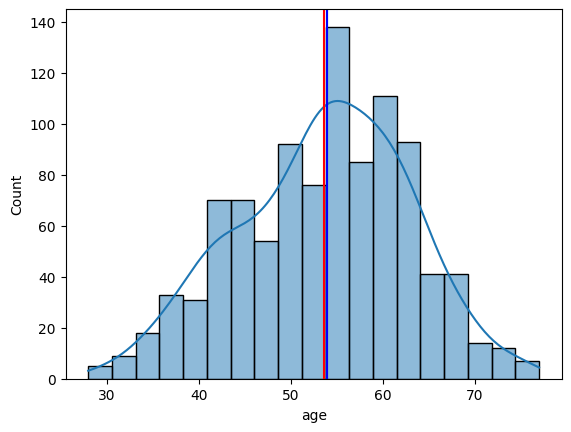

In [ ]:
# Plot the mean, Median and mode of age column using sns (The mode is the value that appears most frequently within the data.)
sns.histplot(data['age'], kde=True)
plt.axvline(data['age'].mean(), color='Red')
plt.axvline(data['age'].median(), color= 'Green')
plt.axvline(data['age'].mode()[0], color='Blue')

# print the value of mean, median and mode of age column
print('Mean', data['age'].mean())
print('Median', data['age'].median())
print('Mode', data['age'].mode())

As we can see the feature almost follows a normal distribution. With a mean equal to 53 and std equal to 9

###Sex Column

In [ ]:
# Find the values of sex column
data['sex'].value_counts()

sex
1    784
0    216
Name: count, dtype: int64

In [ ]:
# Find the values count of age column grouping by sex column
data.groupby('sex')['age'].value_counts()

sex  age
0    54     16
     51     14
     62     12
     48     10
     41      9
            ..
1    77      2
     76      1
     33      1
     28      1
     31      1
Name: count, Length: 91, dtype: int64

Do get a better view we will plot the histogram of ht edata above.

In [ ]:
# plot the histogram of age column using plotly and coloring this by sex
import plotly.express as px
fig = px.histogram(data_frame=data, x='age', color='sex',
                   histfunc='count', # Set histogram function to count
                   barmode='overlay', # Overlay the bars
                   category_orders={'sex': ['female', 'male']}) # Specify the order of categories
fig.show()


As we can see there is a lot more males than females. To indicate the specific % we can perform the below statistic

In [ ]:
# calculating the percentage for male and female value counts in the data
#getting the count of female and male in the dataset
male_count = data['sex'].eq(1).sum()
female_count = data['sex'].eq(0).sum()

total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count/total_count)*100
female_percentages = (female_count/total_count)*100

# display the results
print(f'Male percentage i the data: {male_percentage:.2f}%')
print(f'Female percentage in the data : {female_percentages:.2f}%')

# Difference
difference_percentage = ((male_count - female_count)/female_count) * 100
print(f'Males are {difference_percentage:.2f}% more than female in the data.')

Male percentage i the data: 78.40%
Female percentage in the data : 21.60%
Males are 262.96% more than female in the data.


###Resting bp Column

In [ ]:
# find the unique values in the dataset column
data['resting bp s'].value_counts()

resting bp s
120    144
130    130
140    121
150     69
110     66
      ... 
185      1
98       1
92       1
113      1
129      1
Name: count, Length: 66, dtype: int64

In [ ]:
# plot the histogram of age column using plotly and coloring this by sex
import plotly.express as px
fig = px.histogram(data_frame=data, x='resting bp s', color='sex',
                   histfunc='count', # Set histogram function to count
                   barmode='overlay', # Overlay the bars
                   category_orders={'sex': ['female', 'male']}) # Specify the order of categories
fig.show()

###Chest pain column

<Axes: xlabel='chest pain type', ylabel='count'>

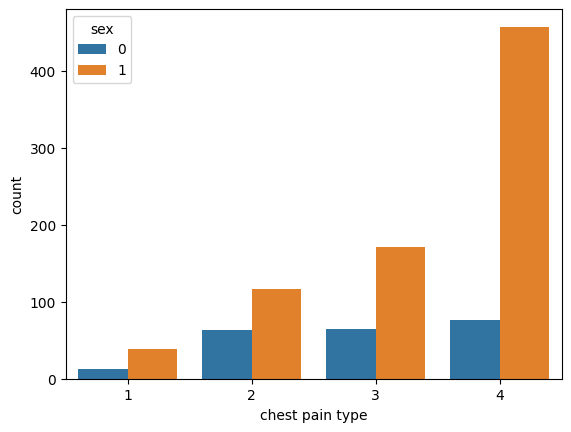

In [ ]:
# count plot of cp column by sex column
sns.countplot(data, x='chest pain type', hue= 'sex')

In [ ]:
# Draw the plot of age column group by chest apin type column

fig = px.histogram(data_frame= data, x='age', color='chest pain type',
                   histfunc='count', # Set histogram function to count
                   barmode='overlay', # Overlay the bars
                   category_orders={'chest pain type': [1,2,3,4]}) # Specify the order of categories
fig.show()


###Choleterol

In [ ]:
data['cholesterol'].value_counts()

cholesterol
0      172
254     13
219     12
230     11
216     10
      ... 
369      1
152      1
85       1
165      1
110      1
Name: count, Length: 218, dtype: int64

In [ ]:
data['cholesterol'].describe()

count    1000.000000
mean      203.371000
std       106.739593
min         0.000000
25%       179.750000
50%       226.000000
75%       268.000000
max       603.000000
Name: cholesterol, dtype: float64

###Fatsting blood sugar

In [ ]:
data['fasting blood sugar'].describe()

count    1000.000000
mean        0.224000
std         0.417131
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: fasting blood sugar, dtype: float64

###Resting ecg

In [ ]:
data['resting ecg'].value_counts()

resting ecg
0    581
2    242
1    177
Name: count, dtype: int64

In [ ]:
data['resting ecg'].describe()

count    1000.000000
mean        0.661000
std         0.841895
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         2.000000
Name: resting ecg, dtype: float64

###Max heart rate

In [ ]:
data['max heart rate'].value_counts()

max heart rate
150    45
140    44
120    37
130    33
160    32
       ..
78      1
77      1
73      1
69      1
202     1
Name: count, Length: 119, dtype: int64

In [ ]:
data['max heart rate'].describe()

count    1000.000000
mean      138.181000
std        25.453922
min        60.000000
25%       120.000000
50%       140.000000
75%       158.000000
max       202.000000
Name: max heart rate, dtype: float64

###Exercise angina

In [ ]:
data['exercise angina'].value_counts()

exercise angina
0    604
1    396
Name: count, dtype: int64

In [ ]:
data['exercise angina'].describe()

count    1000.000000
mean        0.396000
std         0.489309
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: exercise angina, dtype: float64

###Old peak

In [ ]:
data['oldpeak'].value_counts()

oldpeak
 0.0    382
 1.0     89
 2.0     77
 1.5     56
 1.2     30
 3.0     29
 1.4     26
 0.2     25
 0.5     23
 1.8     22
 1.6     21
 0.8     20
 0.6     20
 2.5     18
 0.4     17
 0.1     13
 0.3     11
 2.6     11
 1.3      8
 0.7      7
 2.8      7
 1.9      7
 1.1      7
 4.0      7
 3.6      7
 2.2      7
 1.7      6
 2.4      5
 0.9      4
 3.4      3
 2.3      3
 3.2      3
 3.5      3
 4.2      2
 3.1      2
-0.5      2
 6.2      2
-1.0      2
-0.1      2
 2.1      2
 3.7      1
-2.0      1
-0.8      1
-0.7      1
-1.1      1
-2.6      1
-0.9      1
 5.0      1
 5.6      1
 3.8      1
 2.9      1
-1.5      1
Name: count, dtype: int64

In [ ]:
data['oldpeak'].describe()

count    1000.000000
mean        0.916000
std         1.069621
min        -2.600000
25%         0.000000
50%         0.600000
75%         1.500000
max         6.200000
Name: oldpeak, dtype: float64

###St slope

In [ ]:
data['ST slope'].value_counts()

ST slope
2    488
1    440
3     71
0      1
Name: count, dtype: int64

In [ ]:
data['ST slope'].describe()

count    1000.000000
mean        1.629000
std         0.614603
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         3.000000
Name: ST slope, dtype: float64

###Summurizing the feature analysis.

===== Skewness =====
age = -0.1960210831212059
sex = -1.3823424078445696
chest pain type = -0.9058626638989221
resting bp s = 0.19674692303917762
cholesterol = -0.6908668175991609
fasting blood sugar = 1.3259782816214452
resting ecg = 0.7060834212932444
max heart rate = -0.18952794407576948
exercise angina = 0.4259410287798059
oldpeak = 1.0335793908855568
ST slope = 0.40639648156294883


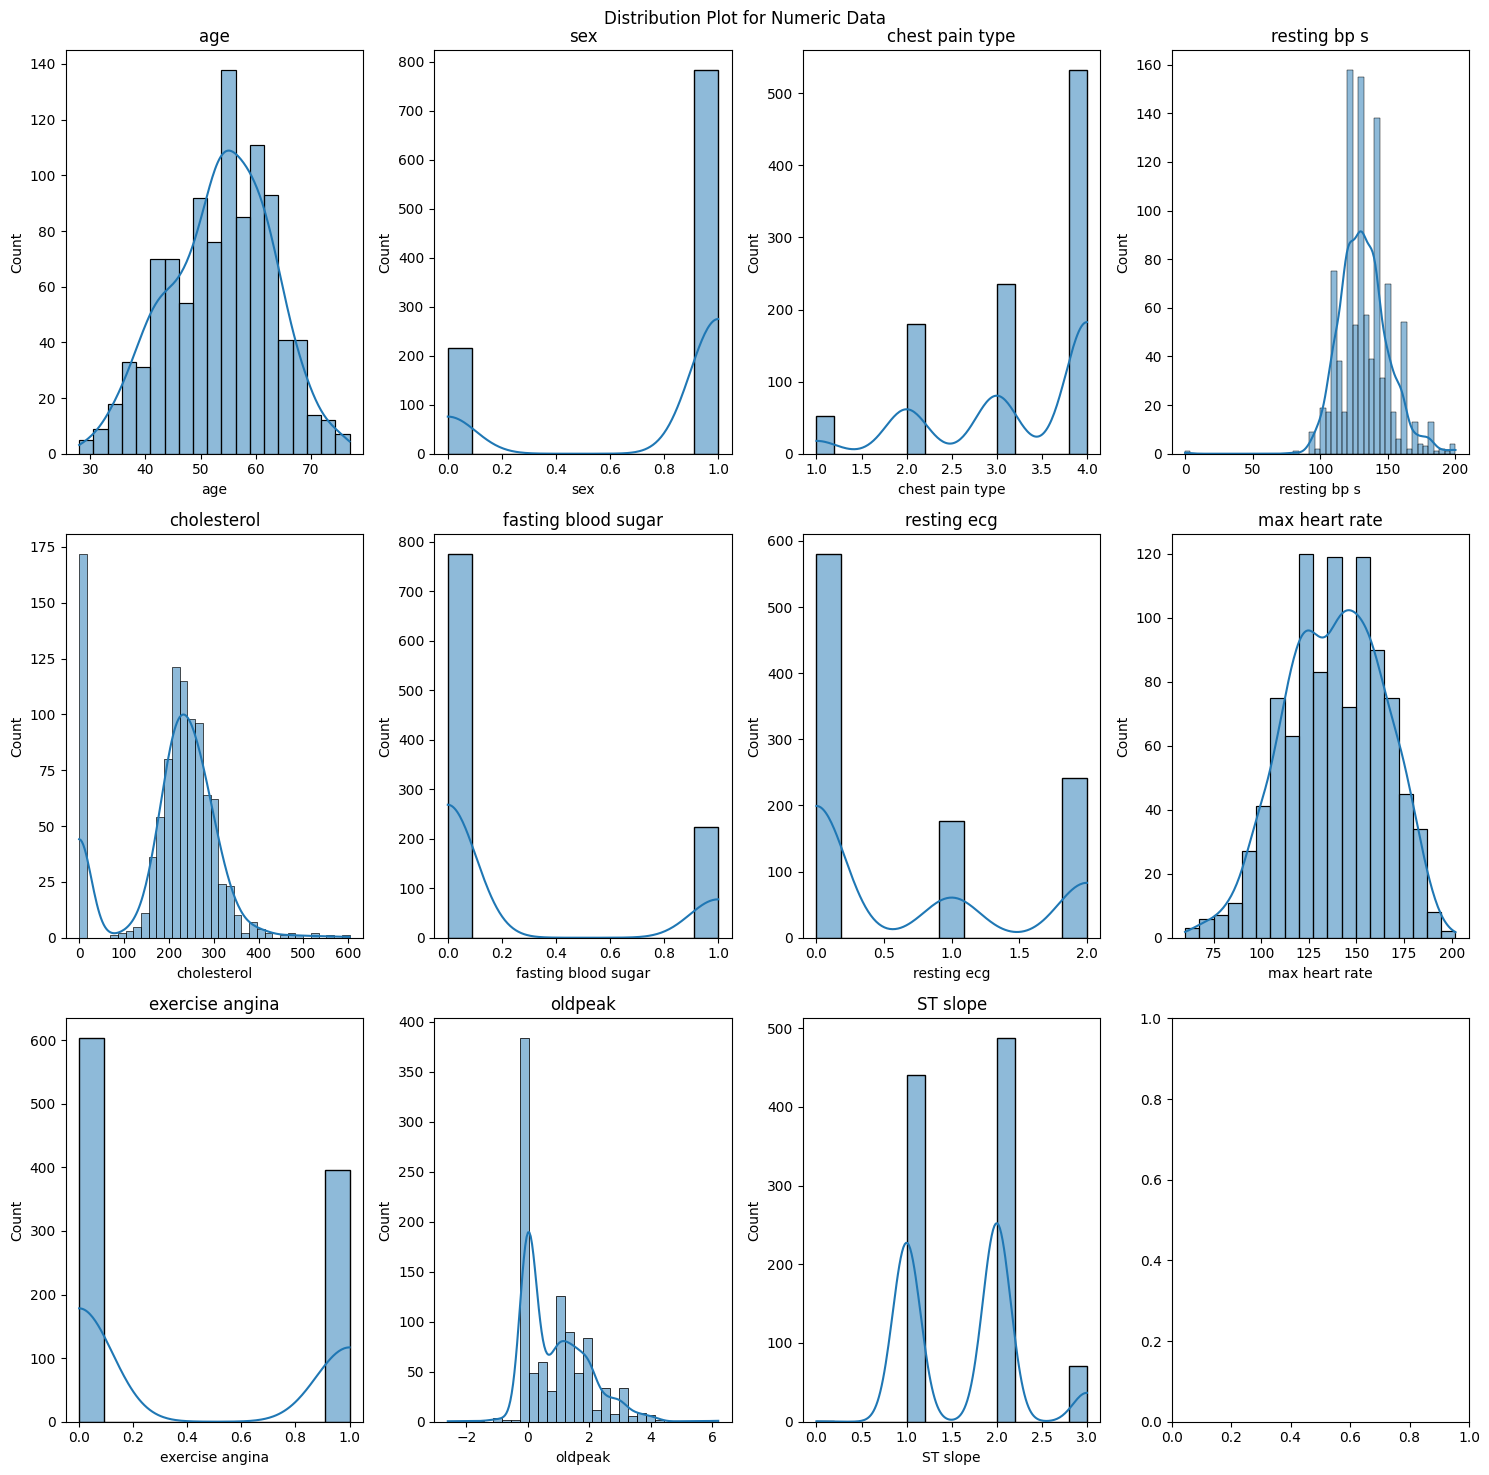

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define your numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Define columns to remove
columns_to_remove = ['patient id', 'heart disease']

# Remove specified columns from numeric_columns
numeric_columns = [col for col in numeric_columns if col not in columns_to_remove]

# Adjust the number of rows and columns based on the number of numeric columns
num_cols = len(numeric_columns)
num_rows = (num_cols + 3) // 4  # Ceiling division to determine the number of rows needed

fig, axes = plt.subplots(num_rows, 4, figsize=(15, 5*num_rows), sharey=False)
plt.suptitle("Distribution Plot for Numeric Data")

axes = axes.flatten()
skewness = data[numeric_columns].skew()

for i, column in enumerate(numeric_columns):
    sns.histplot(x=column, data=data, ax=axes[i], kde=True)
    axes[i].set_title(column)  # Set title for each subplot

print("===== Skewness =====")
for column, skew in zip(numeric_columns, skewness):
    print(f'{column} = {skew}')

plt.tight_layout()
plt.show()


We can see almost 4 normal distribution (age, cholesterol, resting bp s and max heart rate)

Now we check the corroletion between the features.

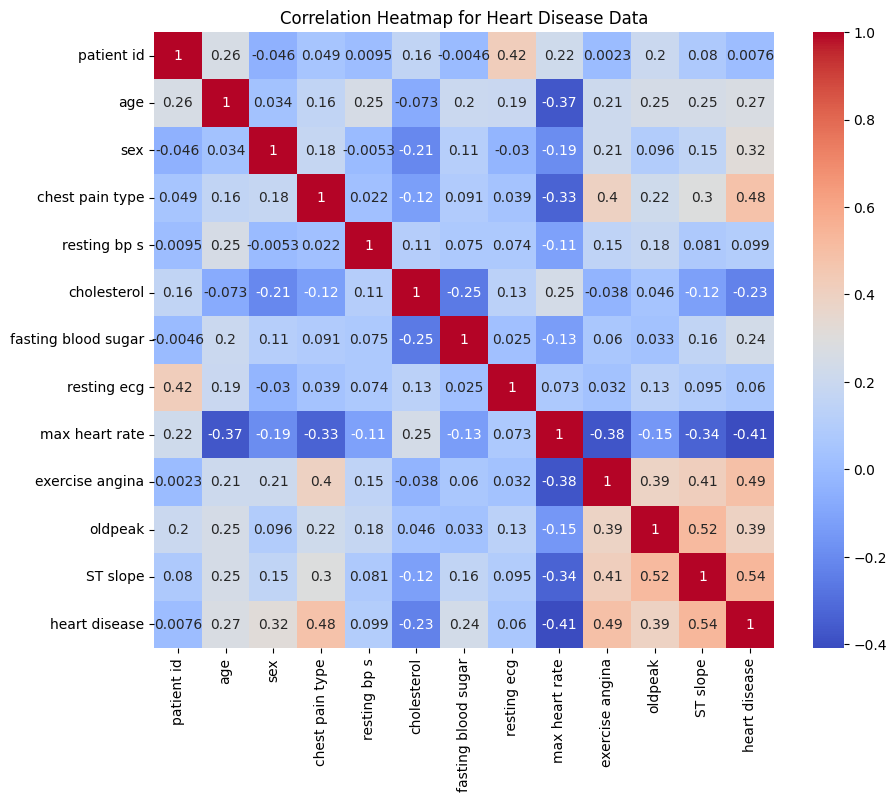

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap using Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Heart Disease Data')
plt.show()

As we can see some features are highly corrolated. We can see that the heart diseas is corrolarted with 4 features more than the others whihc are ST slope, old peak and exercise angina and chest pain. We can also see that between those 4 features that 2 of them are corrolated (exercise angina and chest pain)

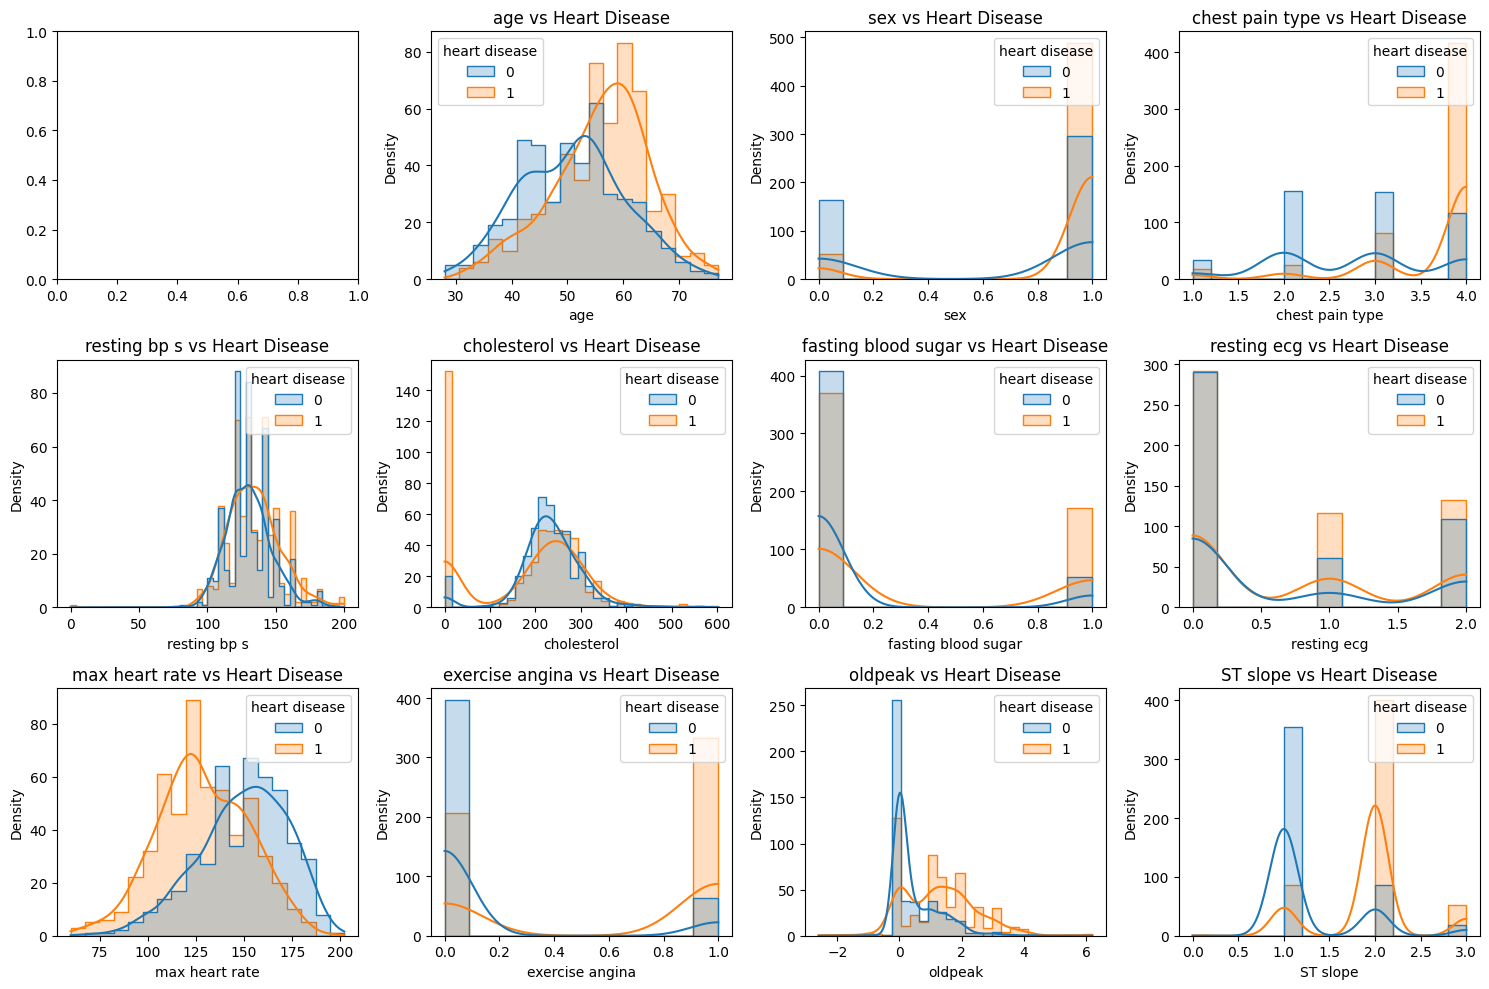

In [ ]:
# Define the features to exclude
exclude_features = ['patient id']

# Define the number of rows and columns for subplots
num_features = len(data.columns) - 1 - len(exclude_features)  # Number of features excluding the target variable and excluded features
num_rows = int(num_features ** 0.5)  # Square root of the number of features
num_cols = (num_features + num_rows - 1) // num_rows  # Ceiling division to determine the number of columns needed

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# Flatten the axes if there is only one row or column
if num_rows == 1 or num_cols == 1:
    axes = axes.flatten()
else:
    axes = [item for sublist in axes for item in sublist]

# Iterate through each feature column
for i, feature in enumerate(data.columns):
    if feature != 'heart disease' and feature not in exclude_features:  # Exclude the target variable and specified features
        sns.histplot(data=data, x=feature, hue='heart disease', kde=True, fill=True, ax=axes[i], element='step')
        axes[i].set_title(f'{feature} vs Heart Disease')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Density')

# Hide empty subplots if any
for j in range(i+1, len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


**Age:** `As we can see between the **ages** 55 and 63, heart disease problem can be seen clearly (peak). `

**Sex:** `I cannot talk too much about the sex because there is a big imbalanc(amount)between the two genders. But we can see that males tend to have heart diseases (more than) males without heart diseas. This is opposed on the female side`

**Chest pain type:** `We can see that for chest pain type 4 it is almost certain that the person has heart disease`

**Resting bp s:** `we can see that the resting blood pb has no effect on identifying heart disease`

**Cholesterol:**  `We can see that low level of cholesterol (0) indicates that there may be a high risk of heart disease`

**Fasting blood sugar:** `We can see that for value 1 (>120 mg/l) the rate of heart diesease is greater`

**Resting ecg:** `We can see that it has no significant effect on the heart disease at any given value`

**Max heart rate:** `We can see that it has no significant effect on the heart disease at any given value. But we can see that density of people with heart disease start with lower heart rate`

**Old peak :**  `We can see that exercise induced angina (1) indicates that there may be a high risk of heart disease.`

**Exercise angina:**  `We can see that values above 1,5 includes higher risk of heart disease.`

**St slope:** `We can see that for St slope type 2 (flat) it is almost certain that the person has heart disease`.







#Data preproccessing

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

Drop unncessary feature

###Handeling imbalances

We have discussed the diffrence between the amount of people with and without heart disease. So to fix this problem we will duplicate the without heart disease until they are equal to the amount of people with heart disease. This duplciation process will be random.

In [ ]:
dataHeartDisease = data[data['heart disease'] == 1]    # Filter data for heart disease cases (heart disease == 1)
dataNoHeartDisease = data[data['heart disease'] == 0] # Filter data for non-heart disease cases (heart disease == 0)

duplicates = len(dataHeartDisease) - len(dataNoHeartDisease) # Calculate the difference in the number of cases between the two groups
dataNoHeartDiseaseBalanced = dataNoHeartDisease.sample(n=duplicates, replace=True, random_state=42) # Oversample the non-heart disease data to match the number of heart disease cases


dataBalanced = pd.concat([dataHeartDisease,dataNoHeartDisease ,dataNoHeartDiseaseBalanced ]) # Combine the balanced datasets

# Shuffle the dataset
dataBalanced = dataBalanced.sample(frac=1, random_state=112).reset_index(drop=True)

In [ ]:
data["heart disease"].value_counts()

heart disease
1    540
0    460
Name: count, dtype: int64

In [ ]:
dataBalanced["heart disease"].value_counts()

heart disease
0    540
1    540
Name: count, dtype: int64

As we can see now we have the same amount of people with and without heart disease.

###Splitting the data into training and testing

####Normal data

In [ ]:
# Assuming 'data' is your DataFrame with features and target variable
# Separate features and target variable
X = data.drop(columns=['heart disease','patient id'])  # Features
y = data['heart disease']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(800, 11) (200, 11)
(800,) (200,)


Applying standerization to the normal data

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#####**Applying then PCA** to get the most important features without causing any loss.

> Add blockquote



In [ ]:
#Apply PCA for dimensionality reduction
pca1 = PCA(n_components=0.95)  # Keep 95% of variance
X_train_pca = pca1.fit_transform(X_train_scaled)
X_test_pca = pca1.transform(X_test_scaled)

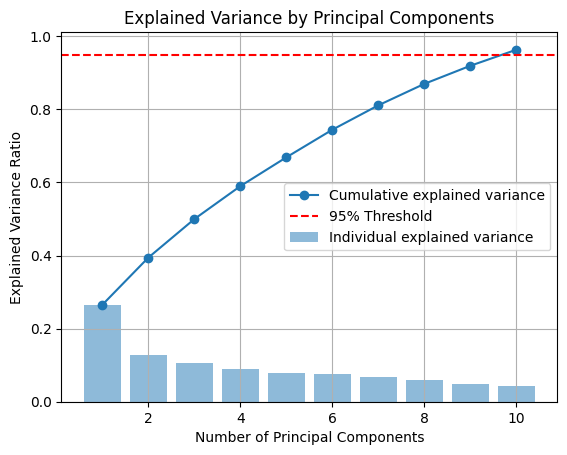

In [ ]:

# Calculate explained variance ratio
explained_variance = pca1.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance ratio
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', label='Cumulative explained variance')

# Plot 95% threshold
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Threshold')

plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.grid(True)
plt.show()


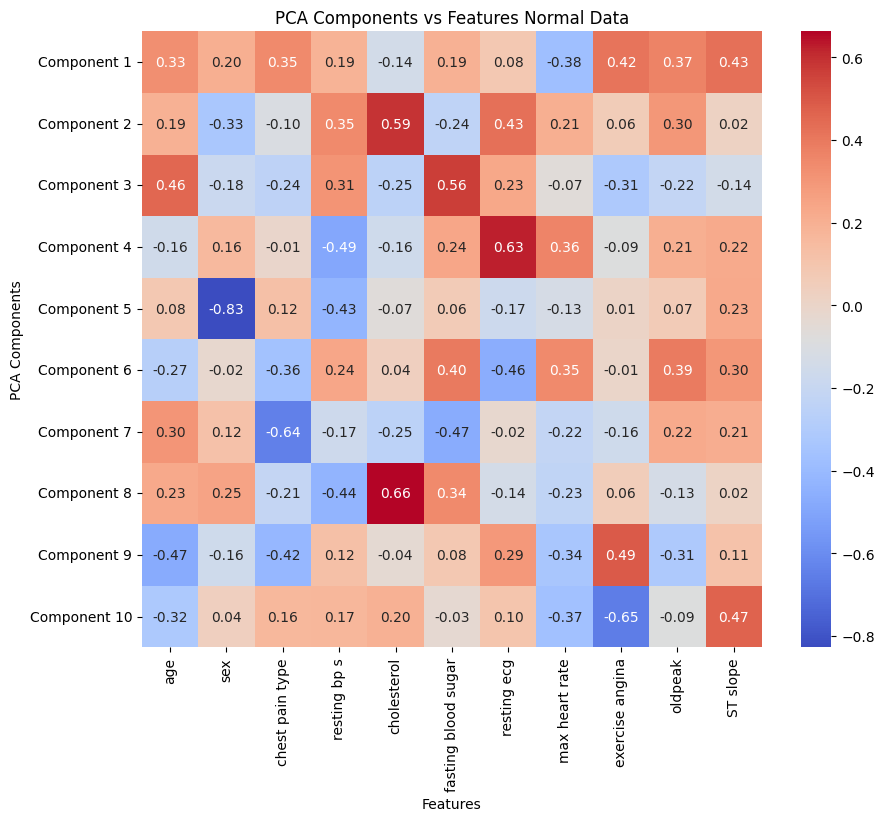

In [ ]:
feature_name = X_train.columns  # Assuming X_trainB is your DataFrame

# Create a DataFrame to hold the feature weights of each PCA component
pca_components_df = pd.DataFrame(pca1.components_, columns=feature_name)

# Create y-axis labels for PCA components
component_labels = [f'Component {i+1}' for i in range(len(pca_components_df))]

# Plot heat map with each PCA component listed vertically
plt.figure(figsize=(10, 8))
sns.heatmap(pca_components_df, cmap='coolwarm', cbar=True, annot=True, fmt=".2f")
plt.title('PCA Components vs Features Normal Data')
plt.xlabel('Features')
plt.ylabel('PCA Components')
plt.yticks(ticks=np.arange(len(pca_components_df)) + 0.5, labels=component_labels, rotation=0)
plt.show()

#####**Applying then PCA** but this time with 3 components

> Add blockquote

In [ ]:


# Apply PCA for dimensionality reduction
pca2 = PCA(n_components=3)  # Keep 3 components
X_train_pca2 = pca2.fit_transform(X_train_scaled)
X_test_pca2 = pca2.transform(X_test_scaled)

# Check the most correlated components
for i, component in enumerate(pca2.components_):
    correlations = pd.Series(component, index=X_train.columns).sort_values(ascending=False)
    print(f"Component {i+1}:")
    print(correlations.head(5))


Component 1:
ST slope           0.425502
exercise angina    0.416916
oldpeak            0.367226
chest pain type    0.347120
age                0.327226
dtype: float64
Component 2:
cholesterol       0.588778
resting ecg       0.427041
resting bp s      0.346254
oldpeak           0.300715
max heart rate    0.206844
dtype: float64
Component 3:
fasting blood sugar    0.564496
age                    0.455662
resting bp s           0.307419
resting ecg            0.233887
max heart rate        -0.065087
dtype: float64


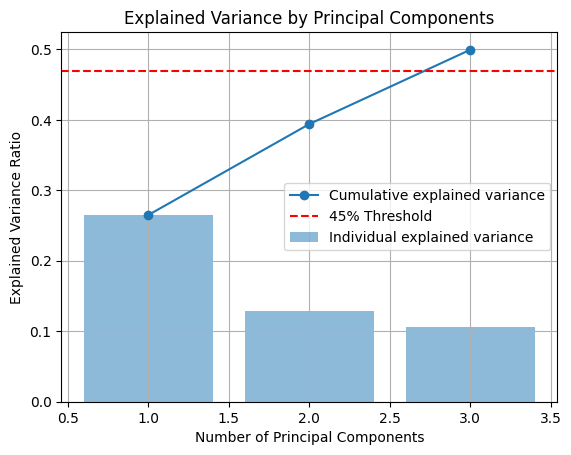

In [ ]:

# Calculate explained variance ratio
explained_variance = pca2.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance ratio
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', label='Cumulative explained variance')

# Plot 95% threshold
plt.axhline(y=0.47, color='r', linestyle='--', label='45% Threshold')

plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.grid(True)
plt.show()


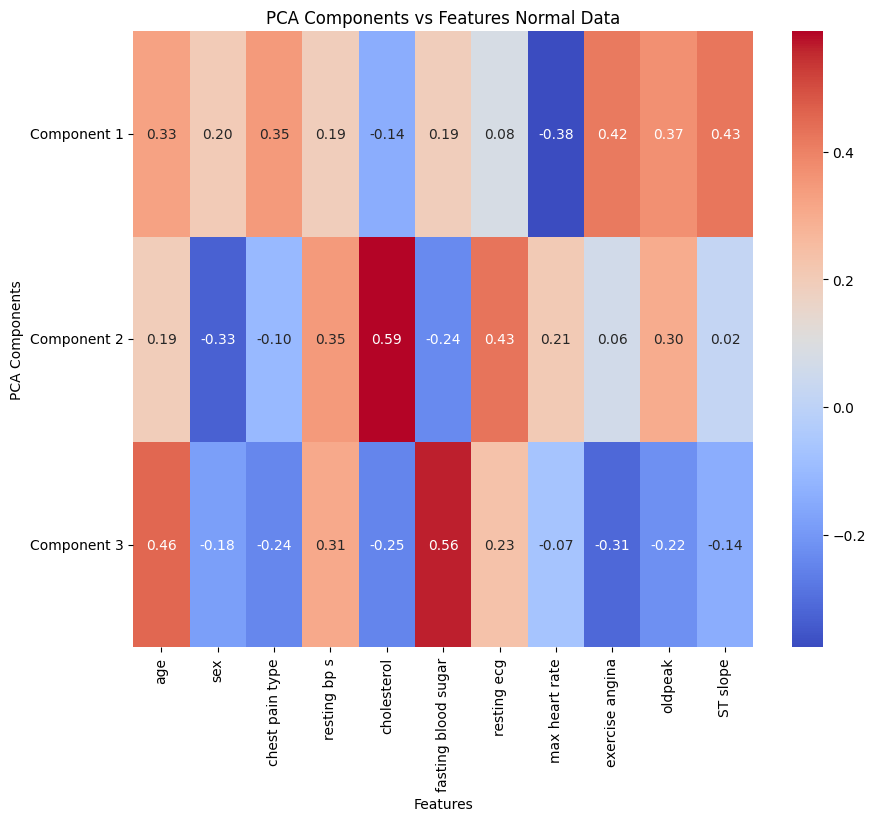

In [ ]:
feature_name = X_train.columns  # Assuming X_trainB is your DataFrame

# Create a DataFrame to hold the feature weights of each PCA component
pca_components_df = pd.DataFrame(pca2.components_, columns=feature_name)

# Create y-axis labels for PCA components
component_labels = [f'Component {i+1}' for i in range(len(pca_components_df))]

# Plot heat map with each PCA component listed vertically
plt.figure(figsize=(10, 8))
sns.heatmap(pca_components_df, cmap='coolwarm', cbar=True, annot=True, fmt=".2f")
plt.title('PCA Components vs Features Normal Data')
plt.xlabel('Features')
plt.ylabel('PCA Components')
plt.yticks(ticks=np.arange(len(pca_components_df)) + 0.5, labels=component_labels, rotation=0)
plt.show()

Merged from hassan

As we can see we will have 10 components.

####Balanced data

In [ ]:
# Assuming 'data' is your DataFrame with features and target variable
# Separate features and target variable
XB = dataBalanced.drop(columns=['heart disease','patient id'])  # Features
yB = dataBalanced['heart disease']  # Target variable

# Split the data into training and testing sets
X_trainB, X_testB, y_trainB, y_testB = train_test_split(XB, yB, test_size=0.2, random_state=42)

In [ ]:
print(X_trainB.shape, X_testB.shape)
print(y_trainB.shape, y_testB.shape)

(864, 11) (216, 11)
(864,) (216,)


Applying standerization to the Balanced data

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_trainB_scaled = scaler.fit_transform(X_trainB)
X_testB_scaled = scaler.transform(X_testB)

#####**Applying then PCA** to get the most important features without causing any loss.

In [ ]:
#Apply PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_trainB_pca = pca.fit_transform(X_trainB_scaled)
X_testB_pca = pca.transform(X_testB_scaled)

As we can see we will have 11 components.

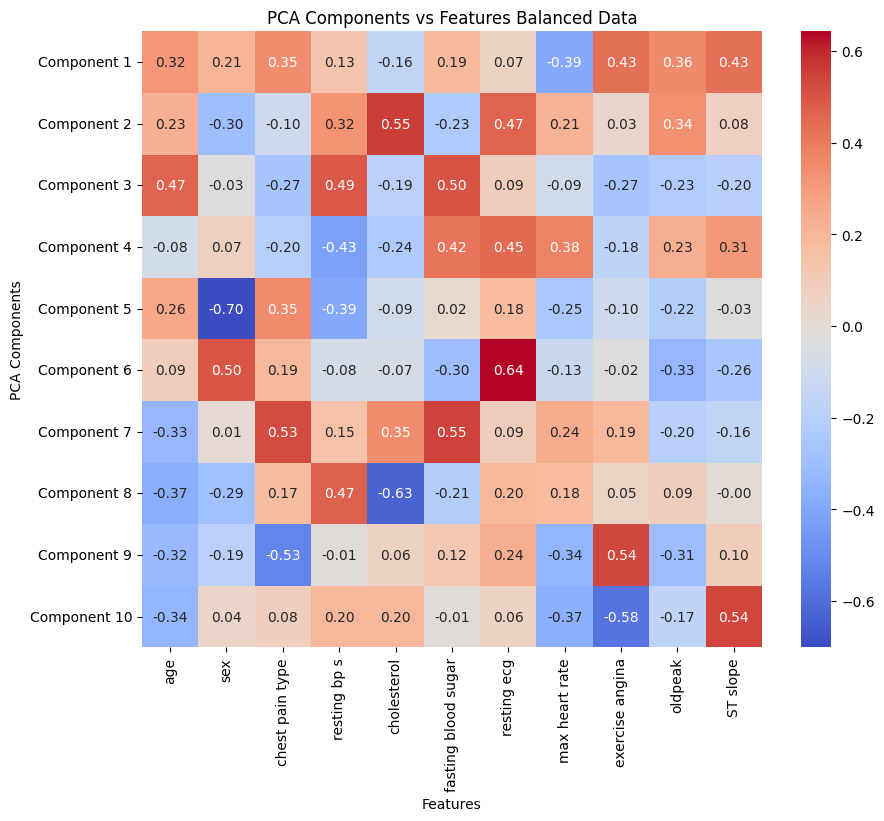

In [ ]:
feature_names = X_trainB.columns  # Assuming X_trainB is your DataFrame

# Create a DataFrame to hold the feature weights of each PCA component
pca_components_df = pd.DataFrame(pca.components_, columns=feature_names)

# Create y-axis labels for PCA components
component_labels = [f'Component {i+1}' for i in range(len(pca_components_df))]

# Plot heat map with each PCA component listed vertically
plt.figure(figsize=(10, 8))
sns.heatmap(pca_components_df, cmap='coolwarm', cbar=True, annot=True, fmt=".2f")
plt.title('PCA Components vs Features Balanced Data')
plt.xlabel('Features')
plt.ylabel('PCA Components')
plt.yticks(ticks=np.arange(len(pca_components_df)) + 0.5, labels=component_labels, rotation=0)
plt.show()

We can see that ST slope is used frequently in every component. And we can see that in component 10 the most deciding feature is the exercise angina.

#####**Applying then PCA** but this time with 3 components

> Add blockquote

In [ ]:


# Apply PCA for dimensionality reduction
pca3 = PCA(n_components=3)  # Keep 3 components
X_trainB_pca3 = pca3.fit_transform(X_trainB_scaled)
X_testB_pca3 = pca3.transform(X_testB_scaled)

# Check the most correlated components
for i, component in enumerate(pca3.components_):
    correlations = pd.Series(component, index=X_trainB.columns).sort_values(ascending=False)
    print(f"Component {i+1}:")
    print(correlations.head(5))


Component 1:
ST slope           0.431883
exercise angina    0.428490
oldpeak            0.356103
chest pain type    0.346503
age                0.316510
dtype: float64
Component 2:
cholesterol     0.553532
resting ecg     0.467129
oldpeak         0.336759
resting bp s    0.324176
age             0.225225
dtype: float64
Component 3:
fasting blood sugar    0.503128
resting bp s           0.492125
age                    0.466529
resting ecg            0.087842
sex                   -0.028242
dtype: float64


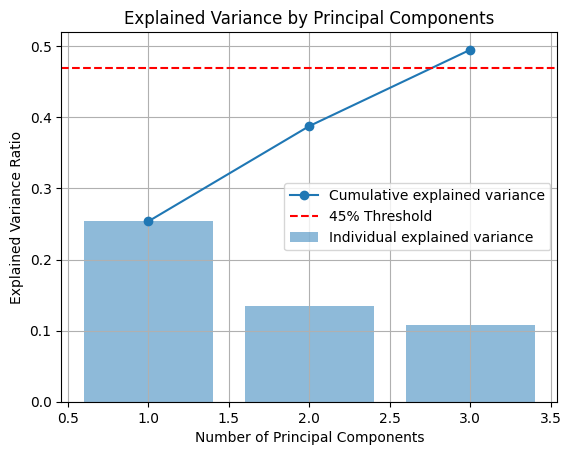

In [ ]:
# Calculate explained variance ratio
explained_variance = pca3.explained_variance_ratio_

# Calculate cumulative explained variance
cumulative_variance = np.cumsum(explained_variance)

# Plot explained variance ratio
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-', label='Cumulative explained variance')

# Plot 95% threshold
plt.axhline(y=0.47, color='r', linestyle='--', label='45% Threshold')

plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance by Principal Components')
plt.legend(loc='best')
plt.grid(True)
plt.show()

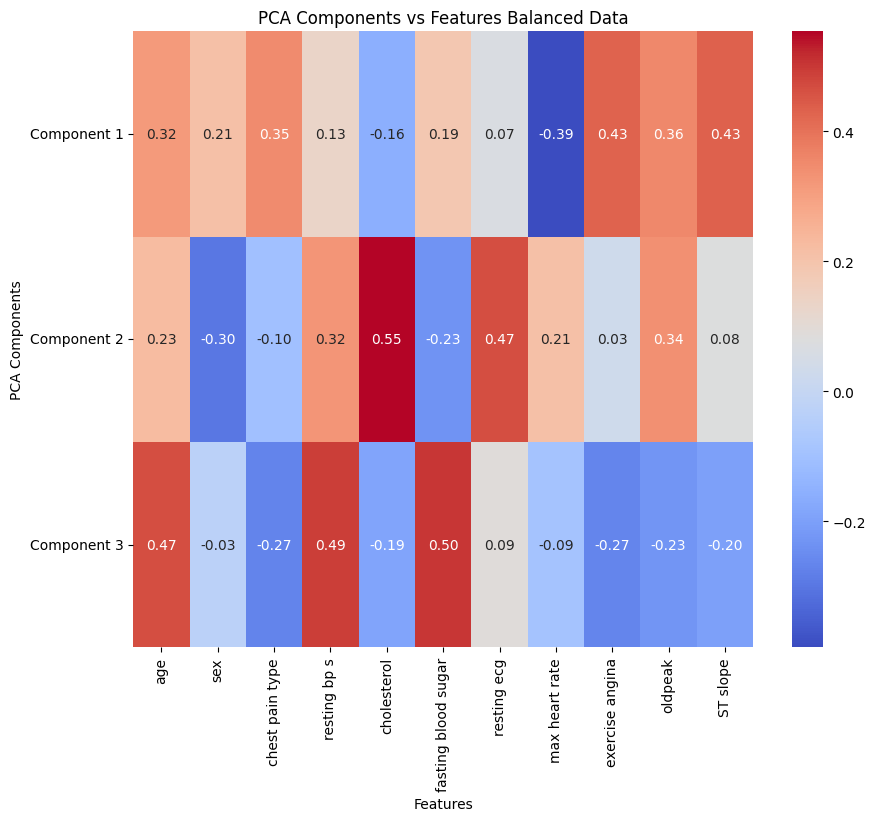

In [ ]:
feature_names = X_trainB.columns  # Assuming X_trainB is your DataFrame

# Create a DataFrame to hold the feature weights of each PCA component
pca_components_df = pd.DataFrame(pca3.components_, columns=feature_names)

# Create y-axis labels for PCA components
component_labels = [f'Component {i+1}' for i in range(len(pca_components_df))]

# Plot heat map with each PCA component listed vertically
plt.figure(figsize=(10, 8))
sns.heatmap(pca_components_df, cmap='coolwarm', cbar=True, annot=True, fmt=".2f")
plt.title('PCA Components vs Features Balanced Data')
plt.xlabel('Features')
plt.ylabel('PCA Components')
plt.yticks(ticks=np.arange(len(pca_components_df)) + 0.5, labels=component_labels, rotation=0)
plt.show()

#Model selection

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

####Normal data

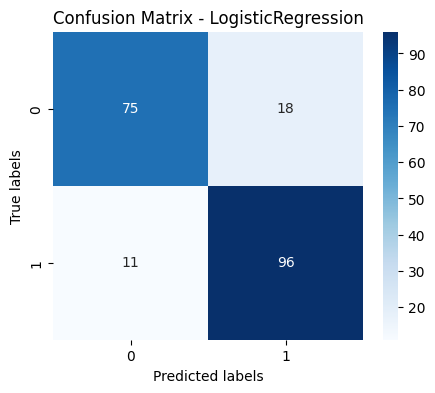

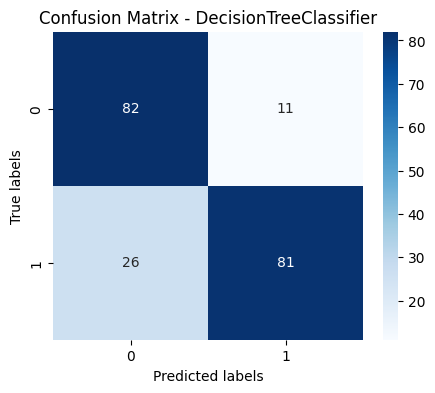

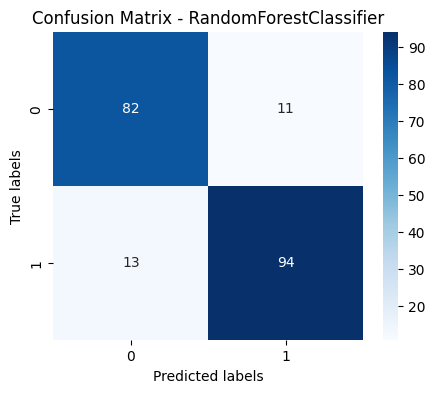

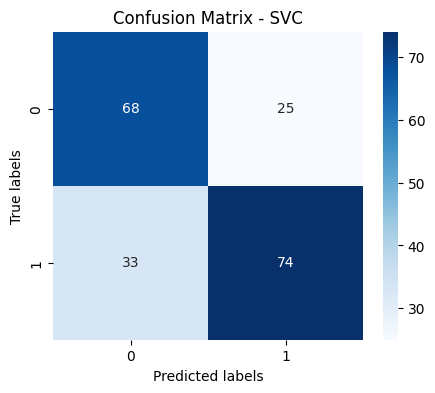

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Set random state
random_state = 82

models = [
    LogisticRegression(random_state=random_state),
    DecisionTreeClassifier(random_state=random_state),
    RandomForestClassifier(random_state=random_state),
    SVC(random_state=random_state),
]

# create empty lists to store the evaluation metrics for each model.
acc_score = []
roc_score = []
f1 = []
name_model = []
conf_matrices = []

# The for loop iterates through each model in the models list
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc_score.append(accuracy_score(y_test, y_pred))
    roc_score.append(roc_auc_score(y_test, y_pred))
    f1.append(f1_score(y_test, y_pred, average='weighted'))
    name_model.append(type(model).__name__)
    conf_matrices.append(confusion_matrix(y_test, y_pred))

result = pd.DataFrame(  # creates a Pandas DataFrame named result containing the following columns:
    {'Model Name': name_model,
     'accuracy': acc_score,
     'roc auc': roc_score,
     'f1-weighted': f1,
     'confusion_matrix': conf_matrices}
)

# sorts the result DataFrame in descending order based on the F1-weighted score.
result.sort_values('f1-weighted', ascending=False)

# Display confusion matrices
for i, conf_matrix in enumerate(result['confusion_matrix']):
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Confusion Matrix - {result.iloc[i]["Model Name"]}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()


In [ ]:
result

,Model Name,accuracy,roc auc,f1-weighted,confusion_matrix
0,LogisticRegression,0.855,0.851824,0.854461,"[[75, 18], [11, 96]]"
1,DecisionTreeClassifier,0.815,0.819365,0.814931,"[[82, 11], [26, 81]]"
2,RandomForestClassifier,0.880,0.880113,0.880072,"[[82, 11], [13, 94]]"
3,SVC,0.710,0.711386,0.710348,"[[68, 25], [33, 74]]"


####Balanced data

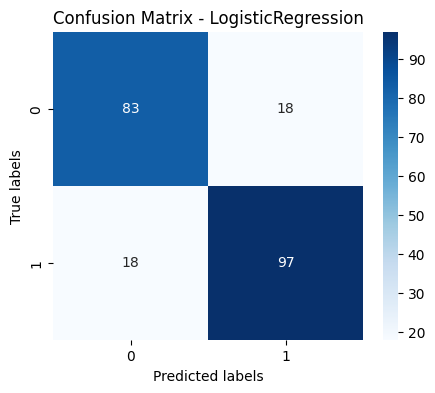

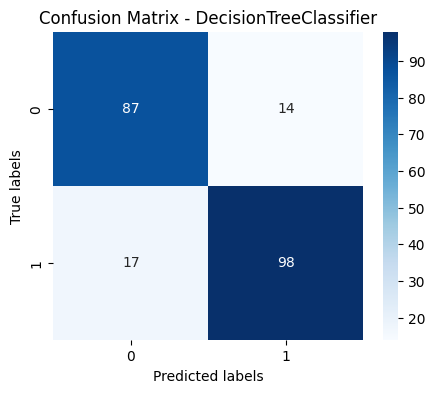

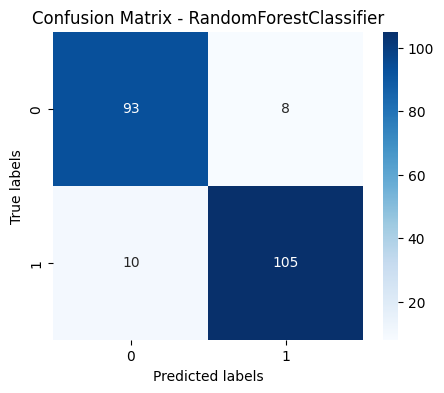

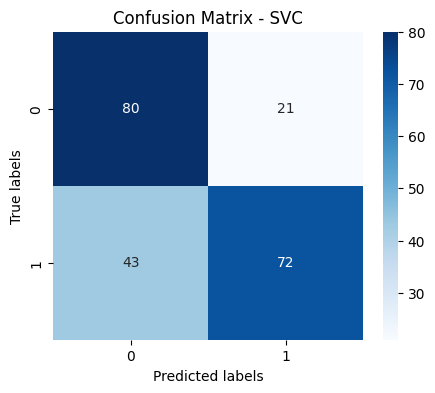

In [ ]:
# reset lists to store the evaluation metrics for each model.
acc_scoreB = []
roc_scoreB = []
f1B = []
name_modelB = []
conf_matricesB = []

for model in models:
    model.fit(X_trainB, y_trainB)
    y_predB = model.predict(X_testB)
    acc_scoreB.append(accuracy_score(y_testB, y_predB))
    roc_scoreB.append(roc_auc_score(y_testB, y_predB))
    f1B.append(f1_score(y_testB, y_predB, average='weighted'))
    name_modelB.append(type(model).__name__)
    conf_matricesB.append(confusion_matrix(y_testB, y_predB))

resultB = pd.DataFrame(  # creates a Pandas DataFrame named result containing the following columns:
    {'Model Name': name_modelB,
     'accuracy': acc_scoreB,
     'roc auc': roc_scoreB,
     'f1-weighted': f1B,
     'confusion_matrix': conf_matricesB}
)

# sorts the result DataFrame in descending order based on the F1-weighted score.
resultB.sort_values('f1-weighted', ascending=False)

# Display confusion matrices
for i, conf_matrix in enumerate(resultB['confusion_matrix']):
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Confusion Matrix - {resultB.iloc[i]["Model Name"]}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()


In [ ]:
resultB

,Model Name,accuracy,roc auc,f1-weighted,confusion_matrix
0,LogisticRegression,0.833333,0.832630,0.833333,"[[83, 18], [18, 97]]"
1,DecisionTreeClassifier,0.856481,0.856780,0.856583,"[[87, 14], [17, 98]]"
2,RandomForestClassifier,0.916667,0.916918,0.916710,"[[93, 8], [10, 105]]"
3,SVC,0.703704,0.709083,0.702584,"[[80, 21], [43, 72]]"


####Standerized Normal Data

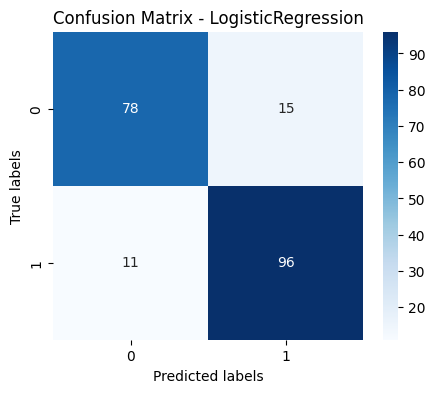

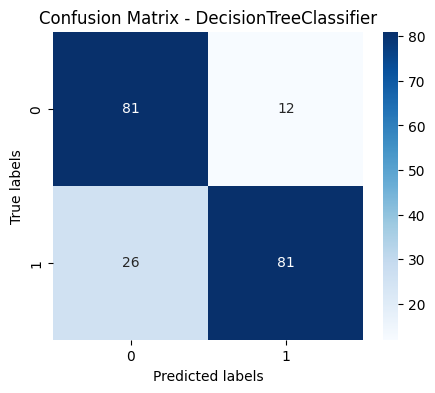

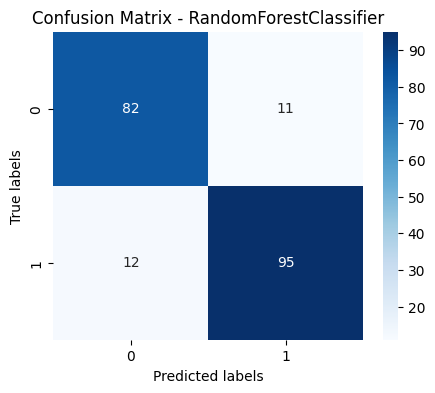

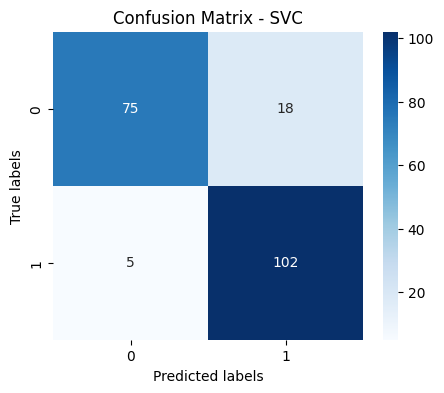

In [ ]:
# reset lists to store the evaluation metrics for each model.
acc_scoreS = []
roc_scoreS = []
f1S = []
name_modelS = []
conf_matricesS = []

for model in models:
    model.fit(X_train_scaled, y_train)
    y_predS = model.predict(X_test_scaled)
    acc_scoreS.append(accuracy_score(y_test, y_predS))
    roc_scoreS.append(roc_auc_score(y_test, y_predS))
    f1S.append(f1_score(y_test, y_predS, average='weighted'))
    name_modelS.append(type(model).__name__)
    conf_matricesS.append(confusion_matrix(y_test, y_predS))

resultS = pd.DataFrame(
    {'Model Name': name_modelS,
     'accuracy': acc_scoreS,
     'roc auc': roc_scoreS,
     'f1-weighted': f1S,
     'confusion_matrix': conf_matricesS}
)

# sorts the result DataFrame in descending order based on the F1-weighted score.
resultS.sort_values('f1-weighted', ascending=False)

# Display confusion matrices
for i, conf_matrix in enumerate(resultS['confusion_matrix']):
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Confusion Matrix - {resultS.iloc[i]["Model Name"]}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()


In [ ]:
resultS

,Model Name,accuracy,roc auc,f1-weighted,confusion_matrix
0,LogisticRegression,0.870,0.867953,0.869764,"[[78, 15], [11, 96]]"
1,DecisionTreeClassifier,0.810,0.813989,0.810000,"[[81, 12], [26, 81]]"
2,RandomForestClassifier,0.885,0.884785,0.885038,"[[82, 11], [12, 95]]"
3,SVC,0.885,0.879861,0.883972,"[[75, 18], [5, 102]]"


The Random Forest Classifier seems to perform the best based on all evaluation metrics and the confusion matrix. It has the highest accuracy, ROC AUC, and F1-weighted score among the models evaluated. Additionally, it has the highest number of true positives and true negatives and the lowest number of false positives and false negatives.

####Standerized Balanced data

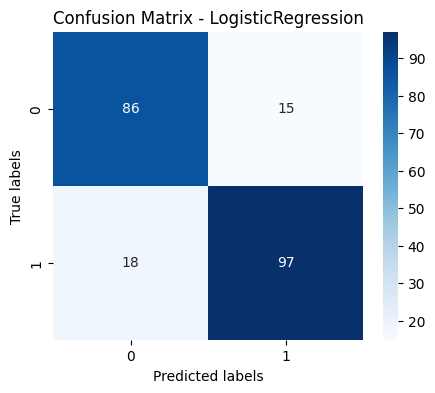

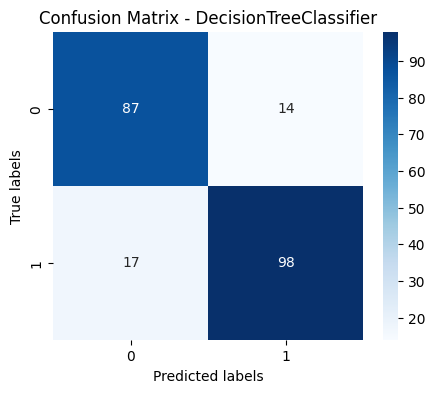

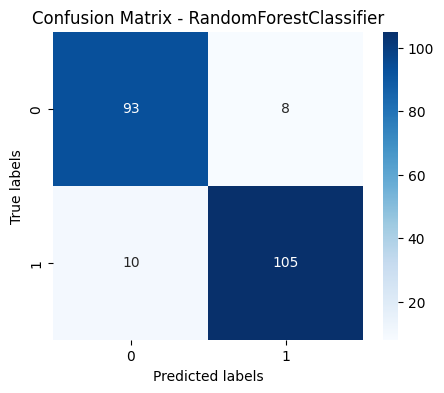

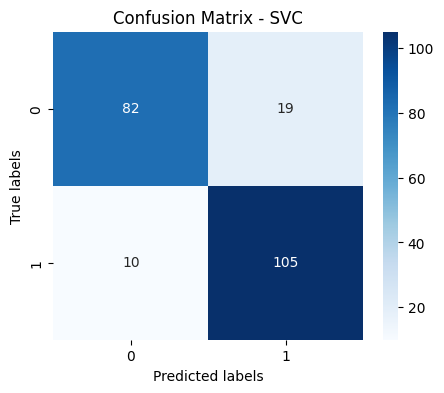

In [ ]:
# reset lists to store the evaluation metrics for each model.
acc_scoreBS = []
roc_scoreBS = []
f1BS = []
name_modelBS = []
conf_matricesBS = []

for model in models:
    model.fit(X_trainB_scaled, y_trainB)  # Trains the model on the scaled training data.
    y_predBS = model.predict(X_testB_scaled)  # Generates predictions for the scaled testing data using the trained model.
    acc_scoreBS.append(accuracy_score(y_testB, y_predBS))
    roc_scoreBS.append(roc_auc_score(y_testB, y_predBS))
    f1BS.append(f1_score(y_testB, y_predBS, average='weighted'))
    name_modelBS.append(type(model).__name__)
    conf_matricesBS.append(confusion_matrix(y_testB, y_predBS))

resultBS = pd.DataFrame(  # creates a Pandas DataFrame named result containing the following columns:
    {'Model Name': name_modelBS,
     'accuracy': acc_scoreBS,
     'roc auc': roc_scoreBS,
     'f1-weighted': f1BS,
     'confusion_matrix': conf_matricesBS}
)

# sorts the result DataFrame in descending order based on the F1-weighted score.
resultBS.sort_values('f1-weighted', ascending=False)

# Display confusion matrices
for i, conf_matrix in enumerate(resultBS['confusion_matrix']):
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Confusion Matrix - {resultBS.iloc[i]["Model Name"]}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()


In [ ]:
resultBS

,Model Name,accuracy,roc auc,f1-weighted,confusion_matrix
0,LogisticRegression,0.847222,0.847482,0.847331,"[[86, 15], [18, 97]]"
1,DecisionTreeClassifier,0.856481,0.856780,0.856583,"[[87, 14], [17, 98]]"
2,RandomForestClassifier,0.916667,0.916918,0.916710,"[[93, 8], [10, 105]]"
3,SVC,0.865741,0.862462,0.865138,"[[82, 19], [10, 105]]"


**Merged from hassan**: This is a simple visualization of the Random forest tree with the best score.

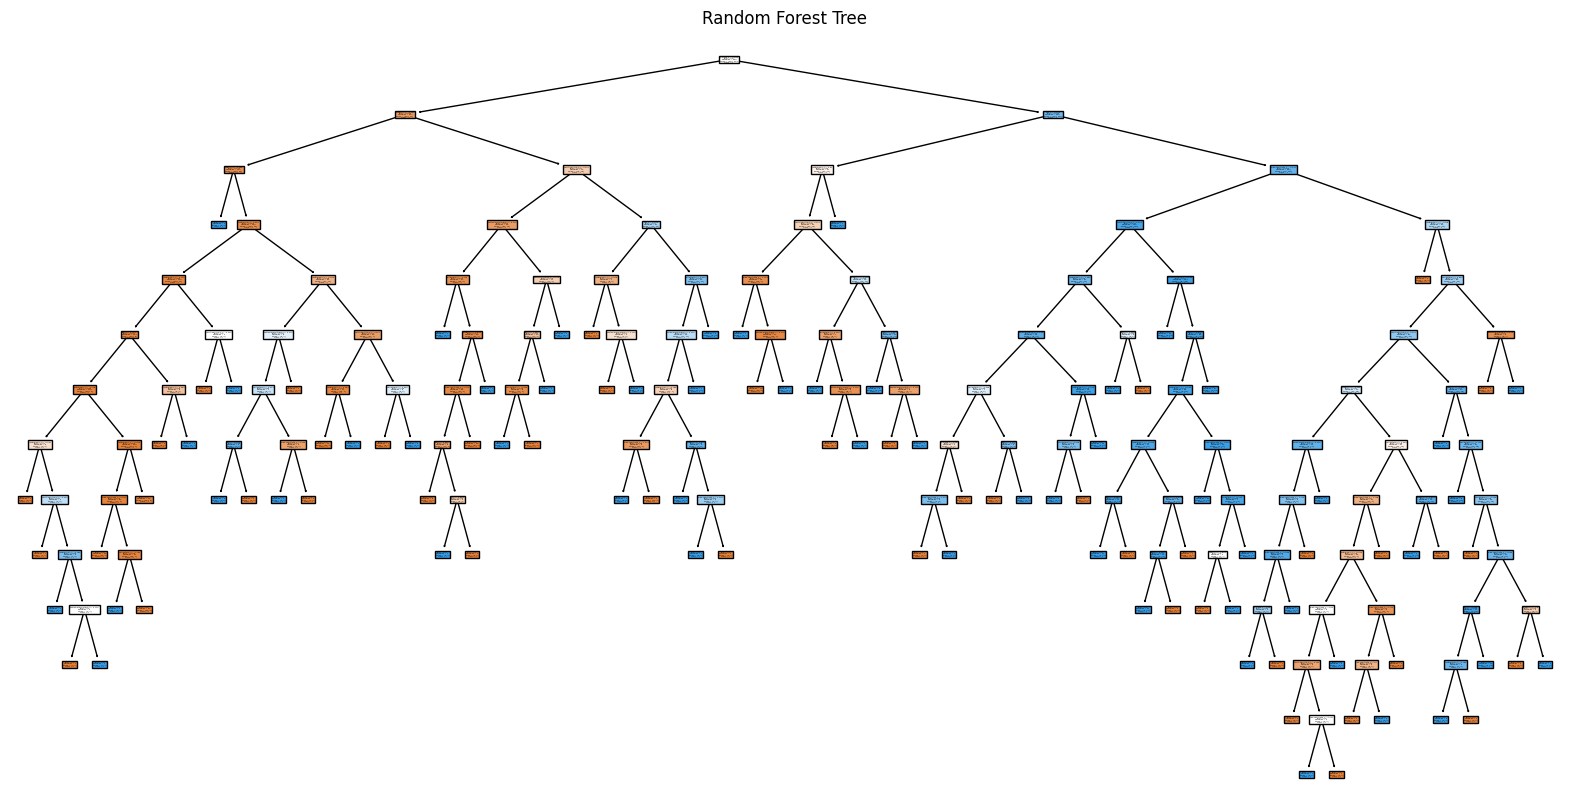

In [ ]:
"""from sklearn.tree import plot_tree

# Assuming models[1] is the DecisionTreeClassifier and models[2] is the RandomForestClassifier

# Visualize one of the decision trees from the RandomForestClassifier
plt.figure(figsize=(20, 10))
plot_tree(models[2].estimators_[0], filled=True, feature_names=X.columns, class_names=['0', '1'])
plt.title("Random Forest Tree")
plt.show()             jad this caused error: IndexError: list index out of range
"""
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Add the missing feature name to the feature_names list
#feature_names.append('thal')

# Plot the first tree in the RandomForestClassifier
plt.figure(figsize=(20, 10))

# Plot the tree again with the modified feature_names list
plot_tree(models[2].estimators_[0],
          filled=True,
          feature_names=feature_names,  # Specify feature_names explicitly
          class_names=['0', '1'])

plt.title("Random Forest Tree")
plt.show()


The Random Forest Classifier again appears to perform the best based on all evaluation metrics and the confusion matrix. It has the highest accuracy, ROC AUC, and F1-weighted score among the models evaluated. Additionally, it has the highest number of true positives and true negatives and the lowest number of false positives and false negatives.

####Standerized Normal data with PCA

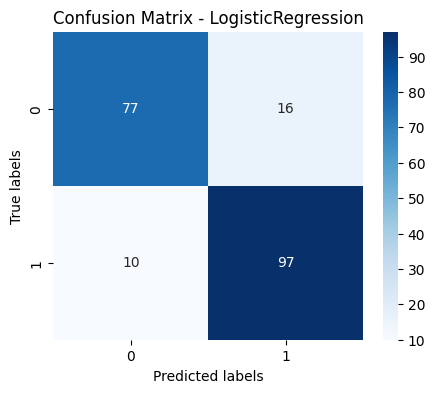

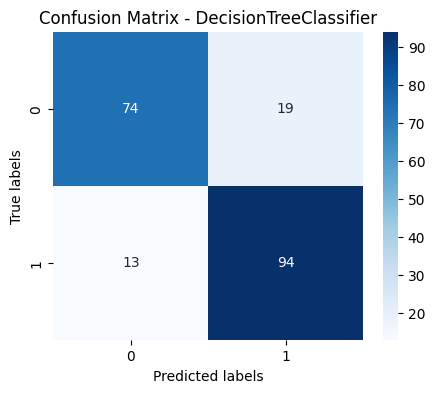

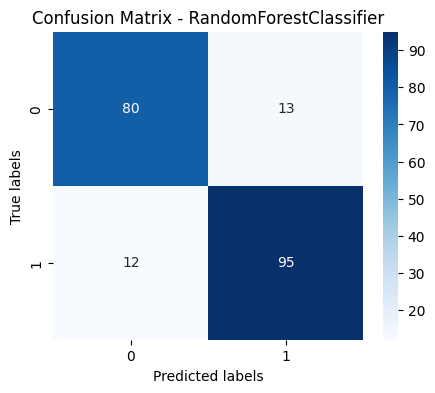

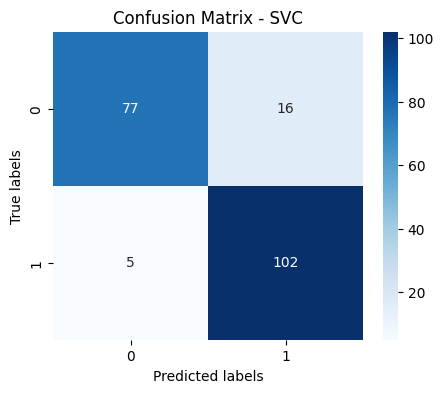

In [ ]:
# reset lists to store the evaluation metrics for each model.
acc_scoreSP = []
roc_scoreSP = []
f1SP = []
name_modelSP = []
conf_matricesSP = []

for model in models:
    model.fit(X_train_pca, y_train)
    y_predSP = model.predict(X_test_pca)
    acc_scoreSP.append(accuracy_score(y_test, y_predSP))
    roc_scoreSP.append(roc_auc_score(y_test, y_predSP))
    f1SP.append(f1_score(y_test, y_predSP, average='weighted'))
    name_modelSP.append(type(model).__name__)
    conf_matricesSP.append(confusion_matrix(y_test, y_predSP))

resultSP = pd.DataFrame(  # creates a Pandas DataFrame named result containing the following columns:
    {'Model Name': name_modelSP,
     'accuracy': acc_scoreSP,
     'roc auc': roc_scoreSP,
     'f1-weighted': f1SP,
     'confusion_matrix': conf_matricesSP}
)

# sorts the result DataFrame in descending order based on the F1-weighted score.
resultBS.sort_values('f1-weighted', ascending=False)

# Display confusion matrices
for i, conf_matrix in enumerate(resultSP['confusion_matrix']):
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Confusion Matrix - {resultSP.iloc[i]["Model Name"]}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()


In [ ]:
resultSP

,Model Name,accuracy,roc auc,f1-weighted,confusion_matrix
0,LogisticRegression,0.870,0.867250,0.869606,"[[77, 16], [10, 97]]"
1,DecisionTreeClassifier,0.840,0.837102,0.839515,"[[74, 19], [13, 94]]"
2,RandomForestClassifier,0.875,0.874033,0.874953,"[[80, 13], [12, 95]]"
3,SVC,0.895,0.890614,0.894267,"[[77, 16], [5, 102]]"


Merged from Hassan

##### Comparasion for the normal dataset with and without PCA for the accuracy, roc and f1 wieghted

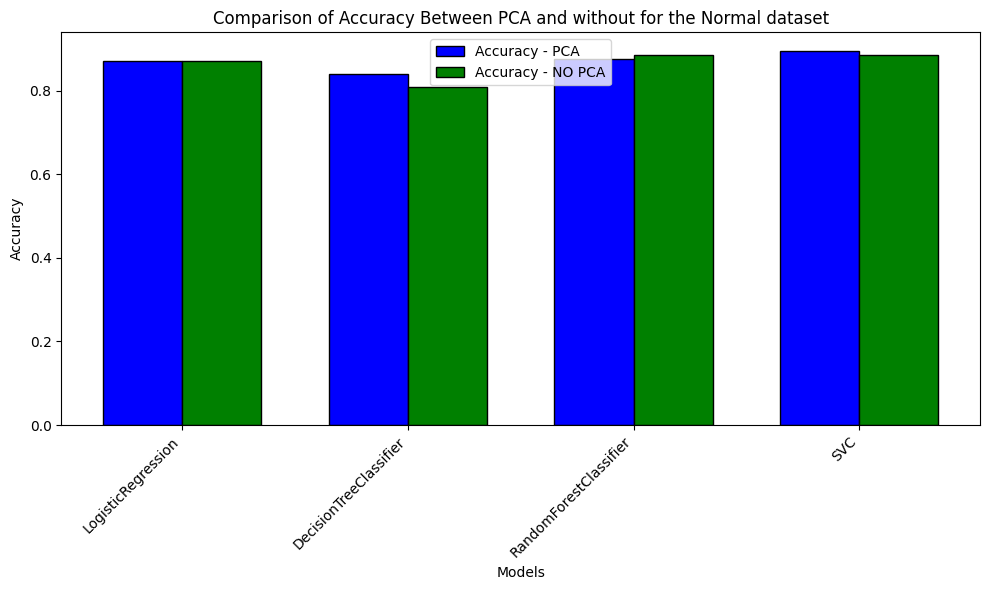

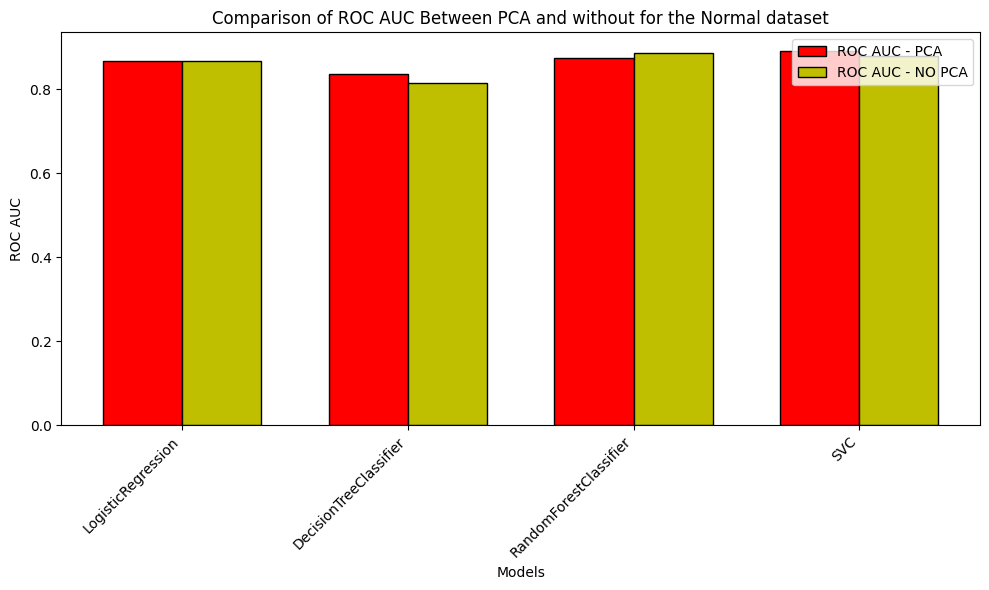

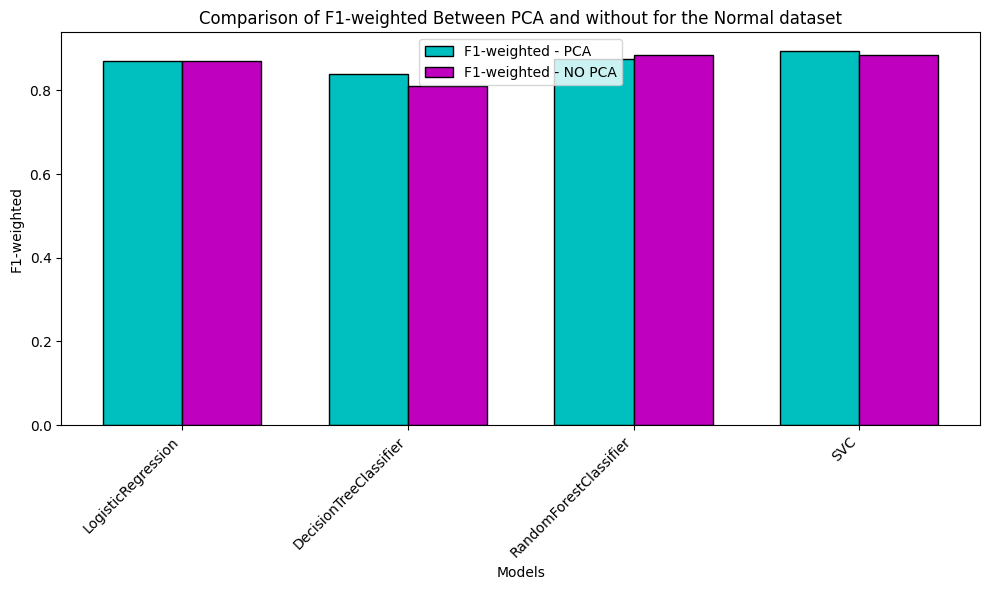

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'Model Name' is the common column in both dataframes
model_names_sp = resultSP['Model Name']
model_names_s = resultS['Model Name']

# Assuming 'accuracy', 'roc auc', and 'f1-weighted' are the metrics columns
accuracy_sp = resultSP['accuracy']
roc_auc_sp = resultSP['roc auc']
f1_weighted_sp = resultSP['f1-weighted']

accuracy_s = resultS['accuracy']
roc_auc_s = resultS['roc auc']
f1_weighted_s = resultS['f1-weighted']

# Set up the figure and axes
num_models = len(model_names_sp)
ind = np.arange(num_models)
width = 0.35

# Plotting for Accuracy
plt.figure(figsize=(10, 6))
plt.bar(ind - width/2, accuracy_sp, width, label='Accuracy - PCA', color='b', edgecolor='black')
plt.bar(ind + width/2, accuracy_s, width, label='Accuracy - NO PCA', color='g', edgecolor='black')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy Between PCA and without for the Normal dataset')
plt.xticks(ind, model_names_sp, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting for ROC AUC
plt.figure(figsize=(10, 6))
plt.bar(ind - width/2, roc_auc_sp, width, label='ROC AUC - PCA', color='r', edgecolor='black')
plt.bar(ind + width/2, roc_auc_s, width, label='ROC AUC - NO PCA', color='y', edgecolor='black')
plt.xlabel('Models')
plt.ylabel('ROC AUC')
plt.title('Comparison of ROC AUC Between PCA and without for the Normal dataset')
plt.xticks(ind, model_names_sp, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting for F1-weighted
plt.figure(figsize=(10, 6))
plt.bar(ind - width/2, f1_weighted_sp, width, label='F1-weighted - PCA', color='c', edgecolor='black')
plt.bar(ind + width/2, f1_weighted_s, width, label='F1-weighted - NO PCA', color='m', edgecolor='black')
plt.xlabel('Models')
plt.ylabel('F1-weighted')
plt.title('Comparison of F1-weighted Between PCA and without for the Normal dataset')
plt.xticks(ind, model_names_sp, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


As we can see from the f1 score PCA increase the score, and accuracy of certain type of models such as SVC while it has no effect on logistic regression for example.

The Random Forest Classifier seems to perform the best based on all evaluation metrics and the confusion matrix. It has the highest accuracy, ROC AUC, and F1-weighted score among the models evaluated. Additionally, it has the highest number of true positives and true negatives and the lowest number of false positives and false negatives.

####Standerized normal data with PCA but with 3 components

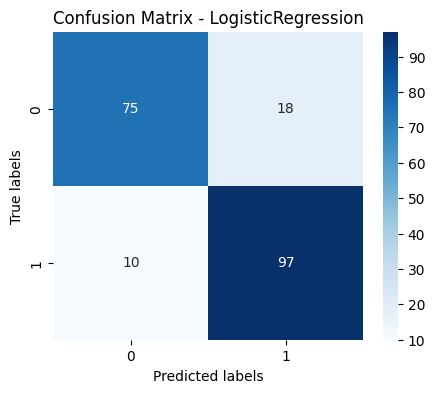

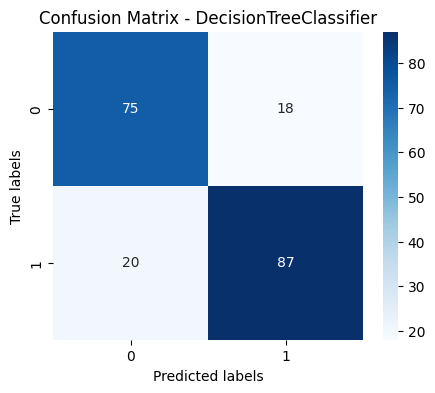

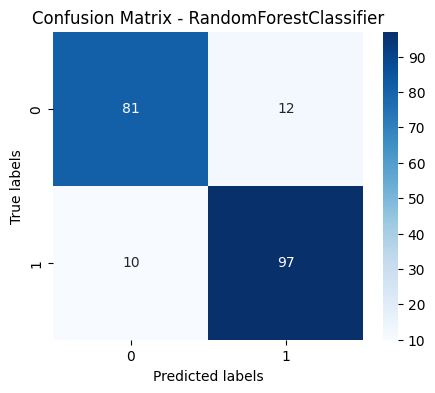

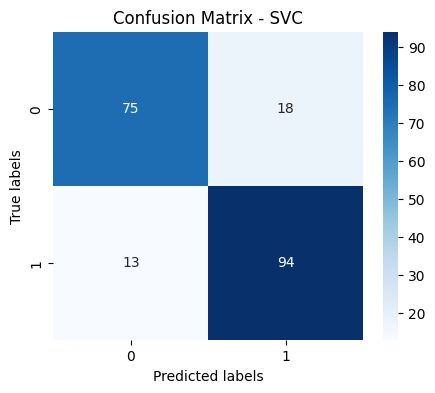

In [ ]:
# reset lists to store the evaluation metrics for each model.
acc_scoreSP1 = []
roc_scoreSP1 = []
f1SP1 = []
name_modelSP1 = []
conf_matricesSP1 = []

for model in models:
    model.fit(X_train_pca2, y_train)
    y_predSP1 = model.predict(X_test_pca2)
    acc_scoreSP1.append(accuracy_score(y_test, y_predSP1))
    roc_scoreSP1.append(roc_auc_score(y_test, y_predSP1))
    f1SP1.append(f1_score(y_test, y_predSP1, average='weighted'))
    name_modelSP1.append(type(model).__name__)
    conf_matricesSP1.append(confusion_matrix(y_test, y_predSP1))

resultSP1 = pd.DataFrame(  # creates a Pandas DataFrame named result containing the following columns:
    {'Model Name': name_modelSP1,
     'accuracy': acc_scoreSP1,
     'roc auc': roc_scoreSP1,
     'f1-weighted': f1SP1,
     'confusion_matrix': conf_matricesSP1}
)

# sorts the result DataFrame in descending order based on the F1-weighted score.
resultBS.sort_values('f1-weighted', ascending=False)

# Display confusion matrices
for i, conf_matrix in enumerate(resultSP1['confusion_matrix']):
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Confusion Matrix - {resultSP.iloc[i]["Model Name"]}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

In [ ]:
resultSP1

,Model Name,accuracy,roc auc,f1-weighted,confusion_matrix
0,LogisticRegression,0.860,0.856497,0.859376,"[[75, 18], [10, 97]]"
1,DecisionTreeClassifier,0.810,0.809768,0.810114,"[[75, 18], [20, 87]]"
2,RandomForestClassifier,0.890,0.888755,0.889911,"[[81, 12], [10, 97]]"
3,SVC,0.845,0.842478,0.844629,"[[75, 18], [13, 94]]"


##### Comparasion for the normal dataset with and without PCA(n=3) for the accuracy, roc and f1 wieghted

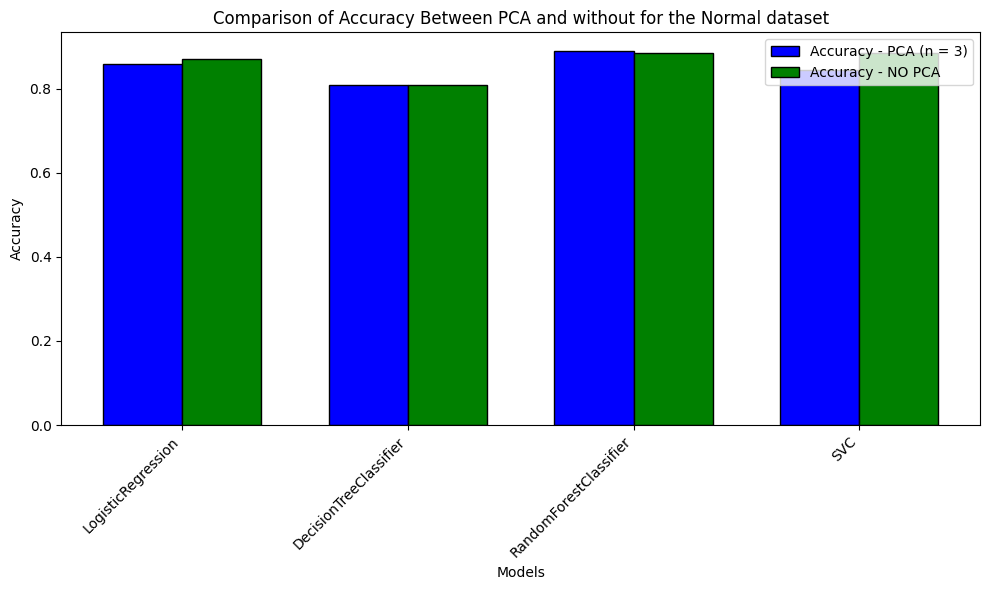

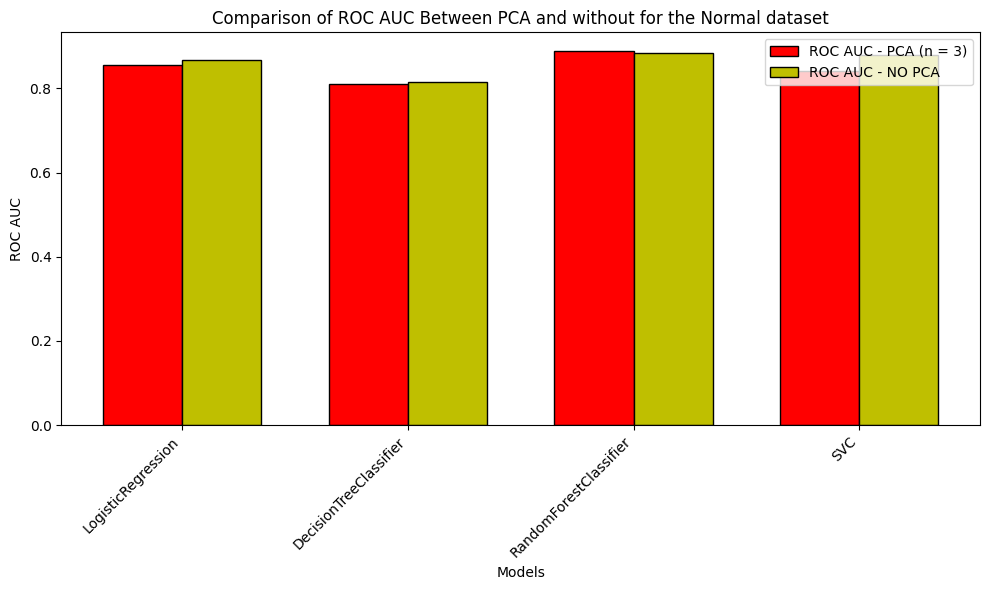

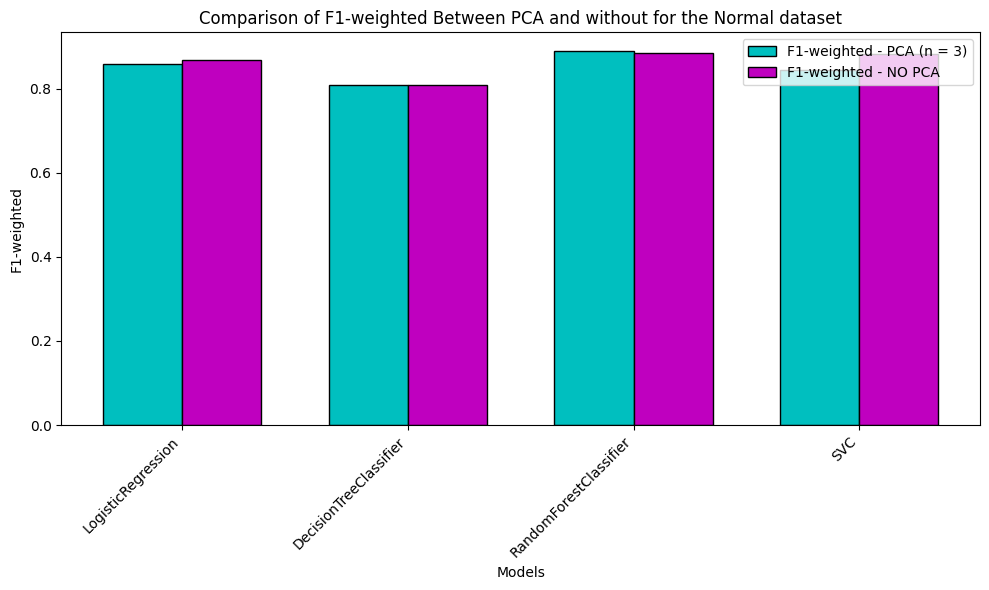

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'Model Name' is the common column in both dataframes
model_names_sp = resultSP1['Model Name']
model_names_s = resultS['Model Name']

# Assuming 'accuracy', 'roc auc', and 'f1-weighted' are the metrics columns
accuracy_sp = resultSP1['accuracy']
roc_auc_sp = resultSP1['roc auc']
f1_weighted_sp = resultSP1['f1-weighted']

accuracy_s = resultS['accuracy']
roc_auc_s = resultS['roc auc']
f1_weighted_s = resultS['f1-weighted']

# Set up the figure and axes
num_models = len(model_names_sp)
ind = np.arange(num_models)
width = 0.35

# Plotting for Accuracy
plt.figure(figsize=(10, 6))
plt.bar(ind - width/2, accuracy_sp, width, label='Accuracy - PCA (n = 3)', color='b', edgecolor='black')
plt.bar(ind + width/2, accuracy_s, width, label='Accuracy - NO PCA', color='g', edgecolor='black')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy Between PCA and without for the Normal dataset')
plt.xticks(ind, model_names_sp, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting for ROC AUC
plt.figure(figsize=(10, 6))
plt.bar(ind - width/2, roc_auc_sp, width, label='ROC AUC - PCA (n = 3)', color='r', edgecolor='black')
plt.bar(ind + width/2, roc_auc_s, width, label='ROC AUC - NO PCA', color='y', edgecolor='black')
plt.xlabel('Models')
plt.ylabel('ROC AUC')
plt.title('Comparison of ROC AUC Between PCA and without for the Normal dataset')
plt.xticks(ind, model_names_sp, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting for F1-weighted
plt.figure(figsize=(10, 6))
plt.bar(ind - width/2, f1_weighted_sp, width, label='F1-weighted - PCA (n = 3)', color='c', edgecolor='black')
plt.bar(ind + width/2, f1_weighted_s, width, label='F1-weighted - NO PCA', color='m', edgecolor='black')
plt.xlabel('Models')
plt.ylabel('F1-weighted')
plt.title('Comparison of F1-weighted Between PCA and without for the Normal dataset')
plt.xticks(ind, model_names_sp, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


####Standerized Balanced data with PCA

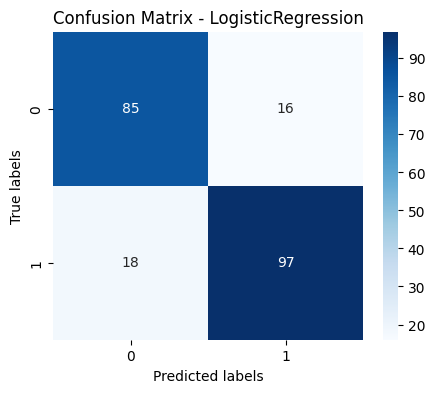

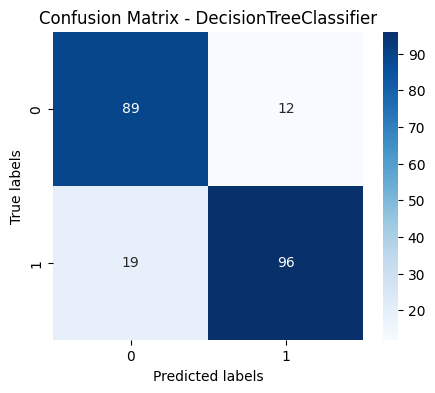

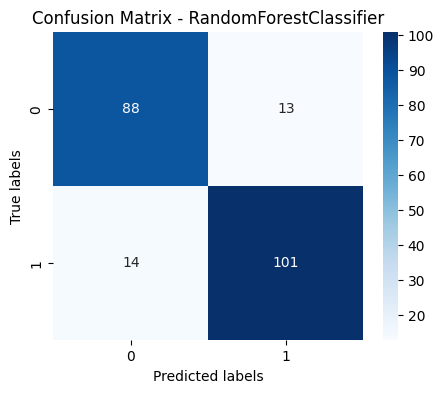

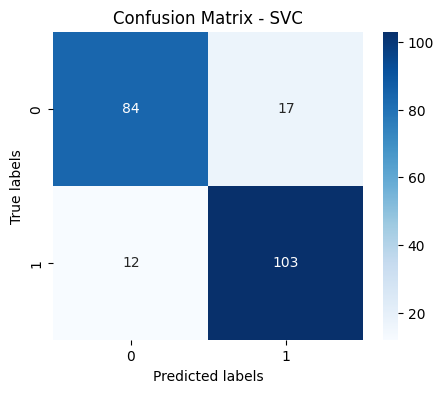

In [ ]:
# reset lists to store the evaluation metrics for each model.
acc_scoreBSP = []
roc_scoreBSP = []
f1BSP = []
name_modelBSP = []
conf_matricesBSP = []

for model in models:
    model.fit(X_trainB_pca, y_trainB)
    y_predBSP = model.predict(X_testB_pca)
    acc_scoreBSP.append(accuracy_score(y_testB, y_predBSP))
    roc_scoreBSP.append(roc_auc_score(y_testB, y_predBSP))
    f1BSP.append(f1_score(y_testB, y_predBSP, average='weighted'))
    name_modelBSP.append(type(model).__name__)
    conf_matricesBSP.append(confusion_matrix(y_testB, y_predBSP))

resultBSP = pd.DataFrame(  # creates a Pandas DataFrame named result containing the following columns:
    {'Model Name': name_modelBSP,
     'accuracy': acc_scoreBSP,
     'roc auc': roc_scoreBSP,
     'f1-weighted': f1BSP,
     'confusion_matrix': conf_matricesBSP}
)

# sorts the result DataFrame in descending order based on the F1-weighted score.
resultBS.sort_values('f1-weighted', ascending=False)

# Display confusion matrices
for i, conf_matrix in enumerate(resultBSP['confusion_matrix']):
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Confusion Matrix - {resultSP.iloc[i]["Model Name"]}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()


In [ ]:
resultBSP

,Model Name,accuracy,roc auc,f1-weighted,confusion_matrix
0,LogisticRegression,0.842593,0.842531,0.842674,"[[85, 16], [18, 97]]"
1,DecisionTreeClassifier,0.856481,0.857985,0.856632,"[[89, 12], [19, 96]]"
2,RandomForestClassifier,0.875000,0.874774,0.875035,"[[88, 13], [14, 101]]"
3,SVC,0.865741,0.863668,0.865465,"[[84, 17], [12, 103]]"


The Random Forest Classifier appears to perform the best based on all evaluation metrics and the confusion matrix. It has the highest accuracy, ROC AUC, and F1-weighted score among the models evaluated. Additionally, it has the highest number of true positives and true negatives and the lowest number of false positives and false negatives.

Checking the Accuracy of the Blanced dataset with and without PCA

Merged from Hassan

##### Comparasion for the balanced dataset with and without PCA for the accuracy, roc and f1 wieghted

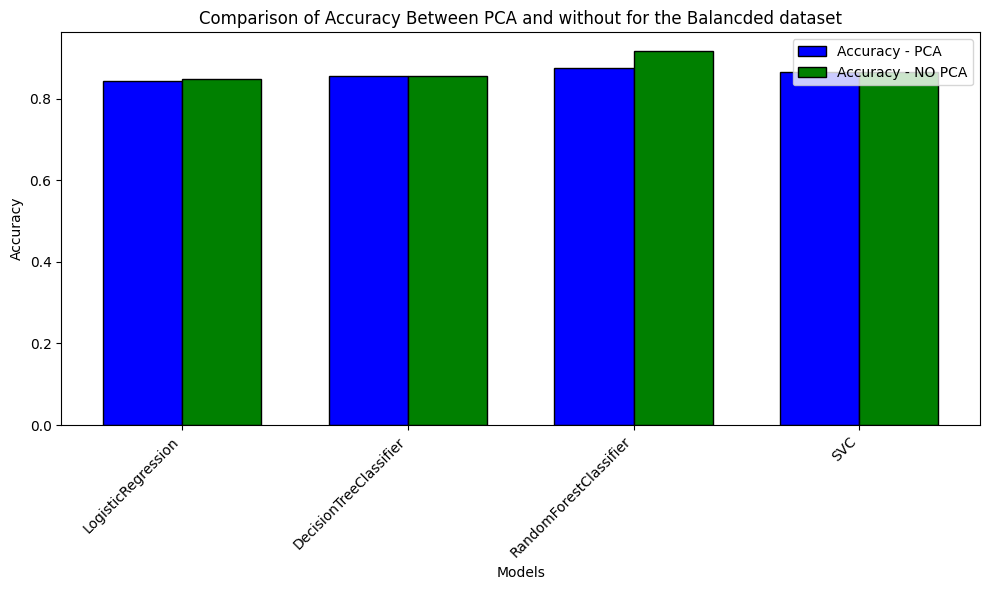

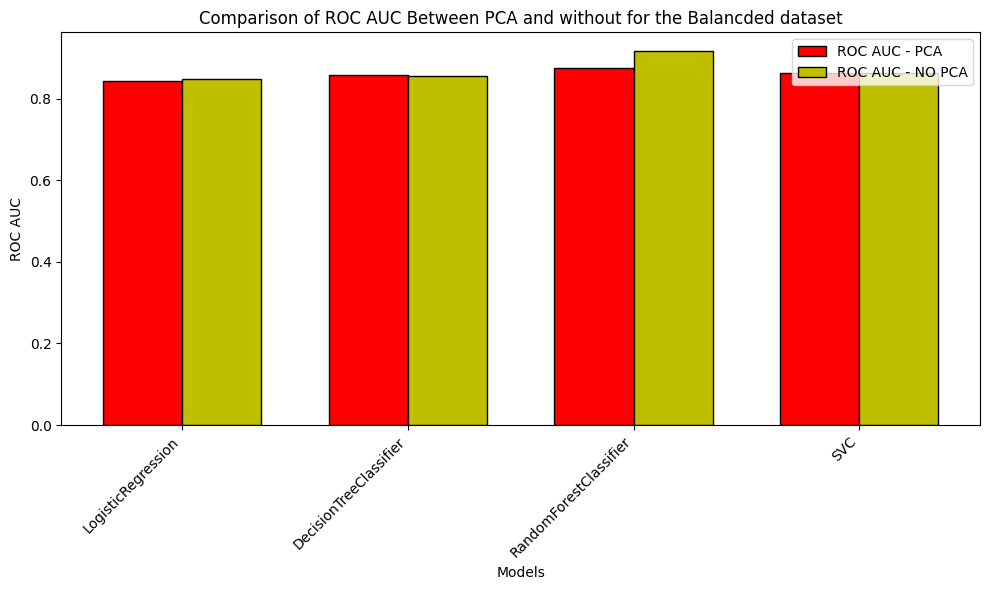

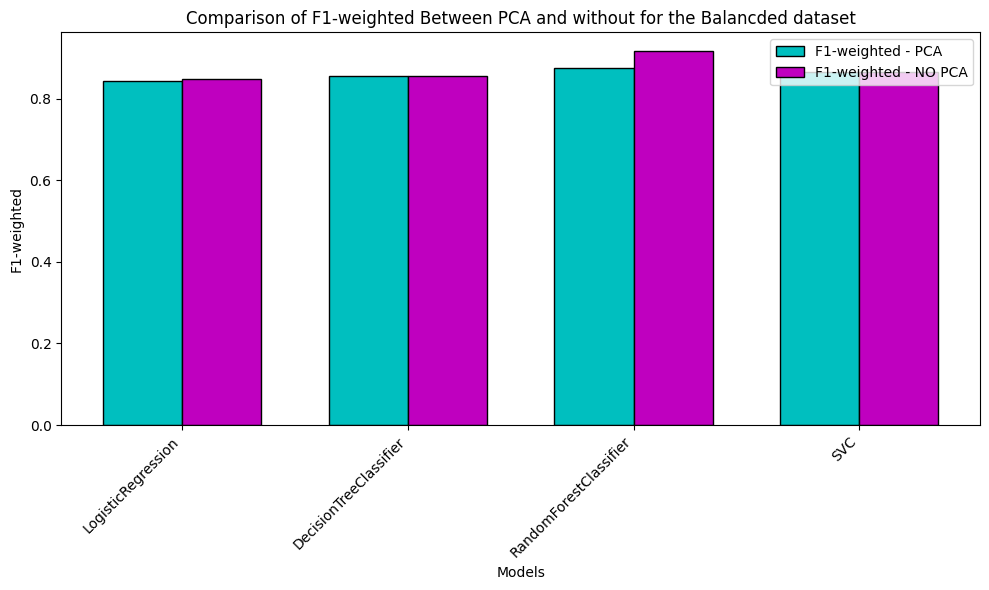

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'Model Name' is the common column in both dataframes
model_names_bsp = resultBSP['Model Name']
model_names_bs = resultBS['Model Name']

# Assuming 'accuracy', 'roc auc', and 'f1-weighted' are the metrics columns
accuracy_bsp = resultBSP['accuracy']
roc_auc_bsp = resultBSP['roc auc']
f1_weighted_bsp = resultBSP['f1-weighted']

accuracy_bs = resultBS['accuracy']
roc_auc_bs = resultBS['roc auc']
f1_weighted_bs = resultBS['f1-weighted']

# Set up the figure and axes
num_models = len(model_names_bsp)
ind = np.arange(num_models)
width = 0.35

# Plotting for Accuracy
plt.figure(figsize=(10, 6))
plt.bar(ind - width/2, accuracy_bsp, width, label='Accuracy - PCA', color='b', edgecolor='black')
plt.bar(ind + width/2, accuracy_bs, width, label='Accuracy - NO PCA', color='g', edgecolor='black')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy Between PCA and without for the Balancded dataset')
plt.xticks(ind, model_names_bsp, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting for ROC AUC
plt.figure(figsize=(10, 6))
plt.bar(ind - width/2, roc_auc_bsp, width, label='ROC AUC - PCA', color='r', edgecolor='black')
plt.bar(ind + width/2, roc_auc_bs, width, label='ROC AUC - NO PCA', color='y', edgecolor='black')
plt.xlabel('Models')
plt.ylabel('ROC AUC')
plt.title('Comparison of ROC AUC Between PCA and without for the Balancded dataset')
plt.xticks(ind, model_names_bsp, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting for F1-weighted
plt.figure(figsize=(10, 6))
plt.bar(ind - width/2, f1_weighted_bsp, width, label='F1-weighted - PCA', color='c', edgecolor='black')
plt.bar(ind + width/2, f1_weighted_bs, width, label='F1-weighted - NO PCA', color='m', edgecolor='black')
plt.xlabel('Models')
plt.ylabel('F1-weighted')
plt.title('Comparison of F1-weighted Between PCA and without for the Balancded dataset')
plt.xticks(ind, model_names_bsp, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


Same as described for the normal dataset but here we can see that i had a remarakable effect on the logisiticRegression model

####Standerized Balanced data with PCA components = 3

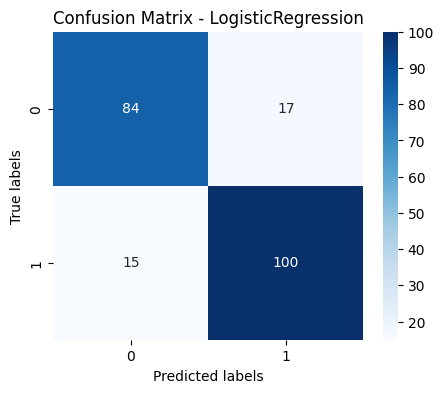

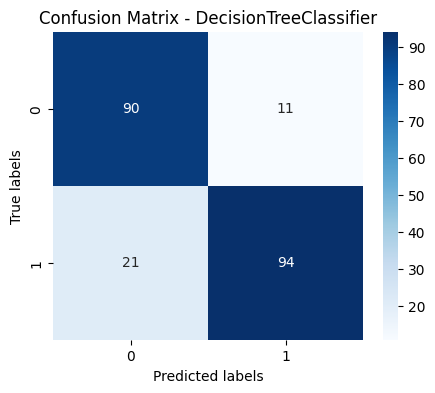

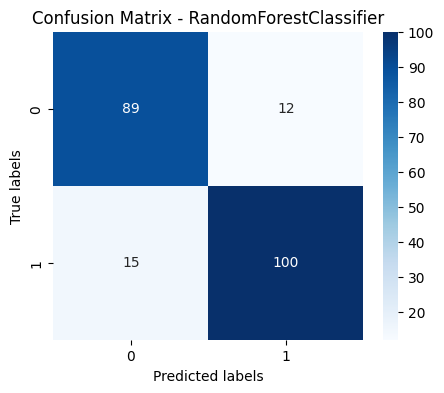

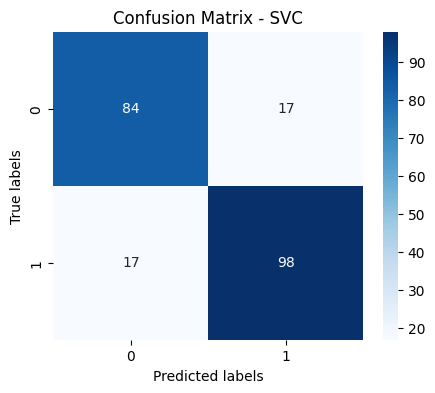

In [ ]:
# reset lists to store the evaluation metrics for each model.
acc_scoreBSP1 = []
roc_scoreBSP1 = []
f1BSP1 = []
name_modelBSP1 = []
conf_matricesBSP1 = []

for model in models:
    model.fit(X_trainB_pca3, y_trainB)
    y_predBSP1 = model.predict(X_testB_pca3)
    acc_scoreBSP1.append(accuracy_score(y_testB, y_predBSP1))
    roc_scoreBSP1.append(roc_auc_score(y_testB, y_predBSP1))
    f1BSP1.append(f1_score(y_testB, y_predBSP1, average='weighted'))
    name_modelBSP1.append(type(model).__name__)
    conf_matricesBSP1.append(confusion_matrix(y_testB, y_predBSP1))

resultBSP1 = pd.DataFrame(  # creates a Pandas DataFrame named result containing the following columns:
    {'Model Name': name_modelBSP1,
     'accuracy': acc_scoreBSP1,
     'roc auc': roc_scoreBSP1,
     'f1-weighted': f1BSP1,
     'confusion_matrix': conf_matricesBSP1}
)

# sorts the result DataFrame in descending order based on the F1-weighted score.
resultBS.sort_values('f1-weighted', ascending=False)

# Display confusion matrices
for i, conf_matrix in enumerate(resultBSP1['confusion_matrix']):
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Confusion Matrix - {resultSP.iloc[i]["Model Name"]}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

In [ ]:
resultBSP1

,Model Name,accuracy,roc auc,f1-weighted,confusion_matrix
0,LogisticRegression,0.851852,0.850624,0.851750,"[[84, 17], [15, 100]]"
1,DecisionTreeClassifier,0.851852,0.854240,0.851979,"[[90, 11], [21, 94]]"
2,RandomForestClassifier,0.875000,0.875377,0.875089,"[[89, 12], [15, 100]]"
3,SVC,0.842593,0.841929,0.842593,"[[84, 17], [17, 98]]"


##### Comparison for the balanced dataset with and without PCA(n=3) for the accuracy, roc and f1 wieghted

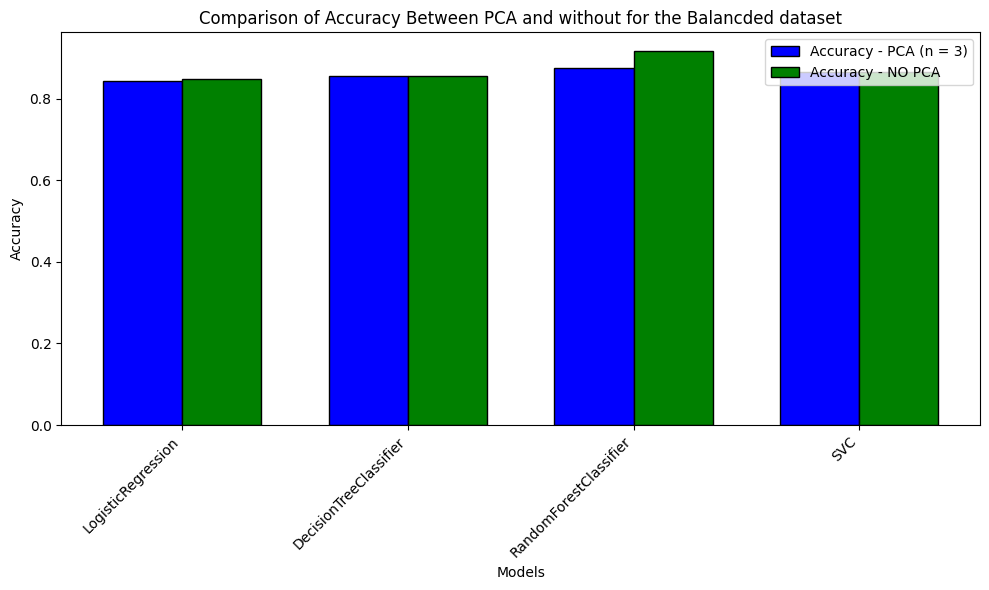

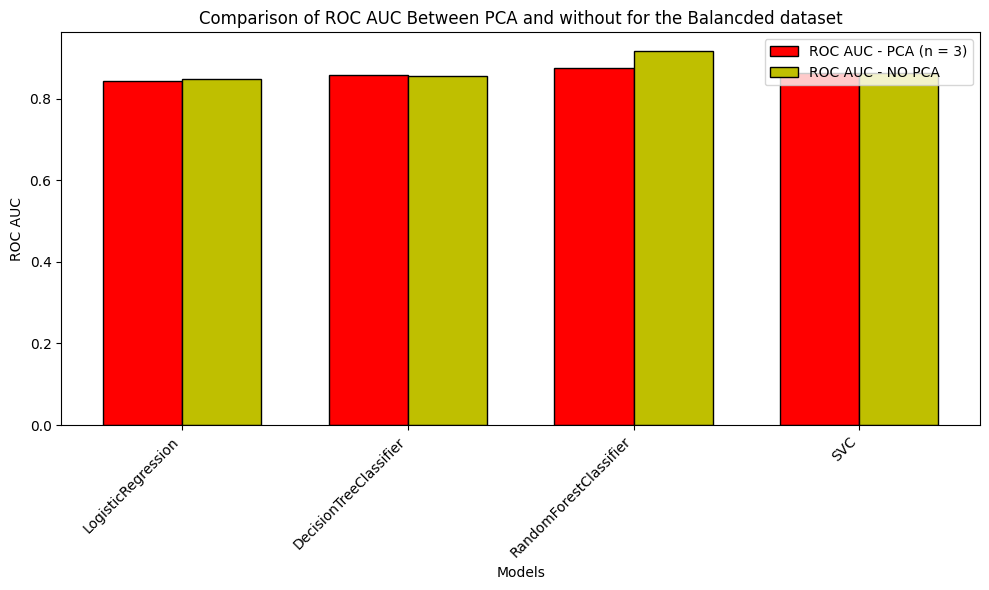

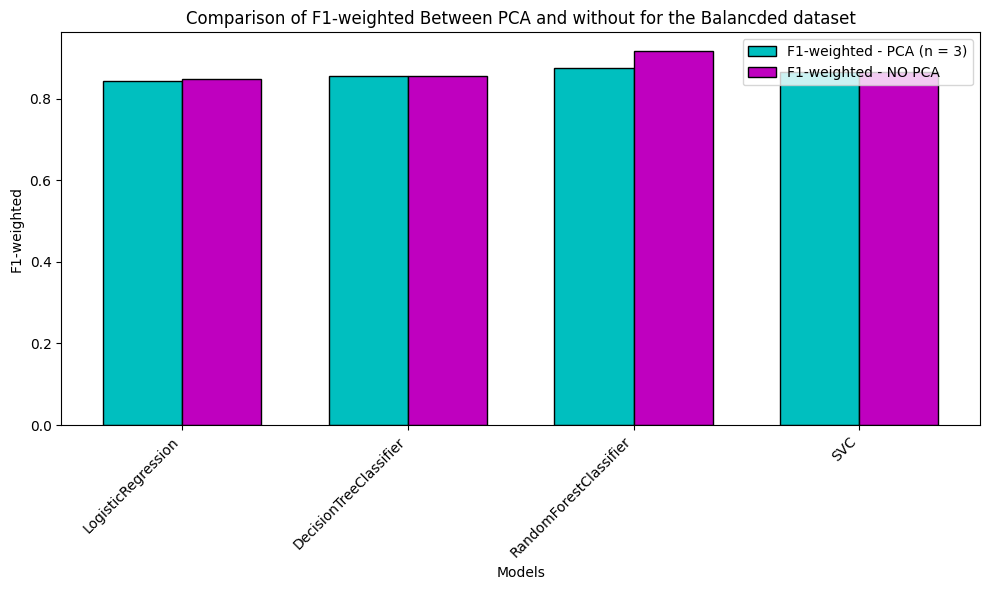

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'Model Name' is the common column in both dataframes
model_names_bsp = resultBSP1['Model Name']
model_names_bs = resultBS['Model Name']

# Assuming 'accuracy', 'roc auc', and 'f1-weighted' are the metrics columns
accuracy_bsp1 = resultBSP1['accuracy']
roc_auc_bsp1 = resultBSP1['roc auc']
f1_weighted_bsp1 = resultBSP1['f1-weighted']

accuracy_bs = resultBS['accuracy']
roc_auc_bs = resultBS['roc auc']
f1_weighted_bs = resultBS['f1-weighted']

# Set up the figure and axes
num_models = len(model_names_bsp)
ind = np.arange(num_models)
width = 0.35

# Plotting for Accuracy
plt.figure(figsize=(10, 6))
plt.bar(ind - width/2, accuracy_bsp, width, label='Accuracy - PCA (n = 3)', color='b', edgecolor='black')
plt.bar(ind + width/2, accuracy_bs, width, label='Accuracy - NO PCA', color='g', edgecolor='black')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy Between PCA and without for the Balancded dataset')
plt.xticks(ind, model_names_bsp, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting for ROC AUC
plt.figure(figsize=(10, 6))
plt.bar(ind - width/2, roc_auc_bsp, width, label='ROC AUC - PCA (n = 3)', color='r', edgecolor='black')
plt.bar(ind + width/2, roc_auc_bs, width, label='ROC AUC - NO PCA', color='y', edgecolor='black')
plt.xlabel('Models')
plt.ylabel('ROC AUC')
plt.title('Comparison of ROC AUC Between PCA and without for the Balancded dataset')
plt.xticks(ind, model_names_bsp, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Plotting for F1-weighted
plt.figure(figsize=(10, 6))
plt.bar(ind - width/2, f1_weighted_bsp, width, label='F1-weighted - PCA (n = 3)', color='c', edgecolor='black')
plt.bar(ind + width/2, f1_weighted_bs, width, label='F1-weighted - NO PCA', color='m', edgecolor='black')
plt.xlabel('Models')
plt.ylabel('F1-weighted')
plt.title('Comparison of F1-weighted Between PCA and without for the Balancded dataset')
plt.xticks(ind, model_names_bsp, rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


This step is just for showcase.Since the model we will be using will be random Forest Classifier

In [ ]:
model = LogisticRegression(penalty='l2', C=1.0,random_state=82)
model.fit(X_trainB_pca, y_trainB)
y_predL2 = model.predict(X_testB_pca)
accuracy_score(y_testB, y_predL2)
roc_auc_score(y_testB, y_predL2)
f1_score(y_testB, y_predL2, average='weighted')


0.8426738141650421

In [ ]:
for model in models:
  if hasattr(model, 'penalty'):
        if 'l2' in model.get_params().keys():
            model.set_params(penalty='l2')

Since the RandomClassifier achieved the highest score it will be used.

Average Accuracy: 0.89125
Average ROC AUC Score: 0.8882482087167102
Average F1-weighted Score: 0.8910288758726823


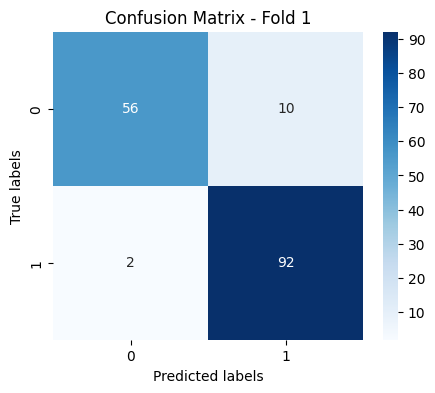

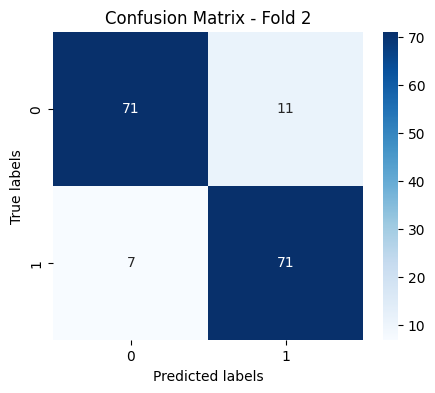

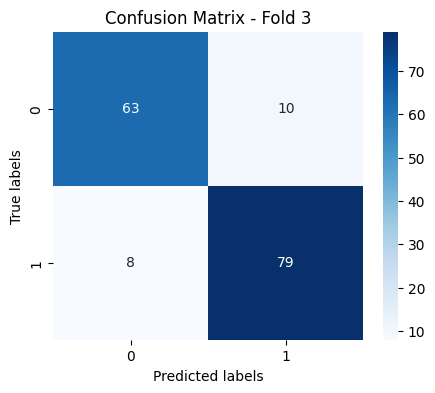

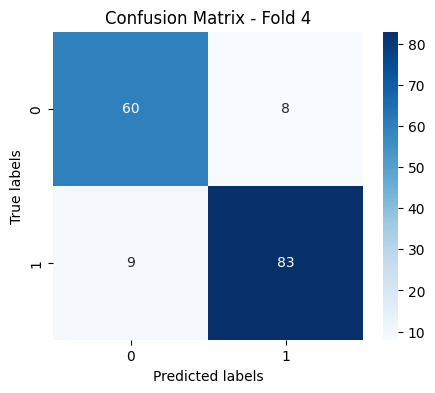

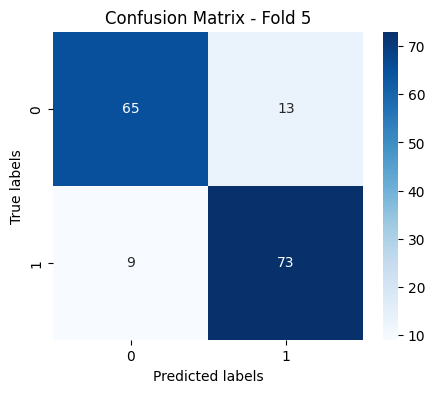

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set random state
random_state = 82

# Initialize RandomForestClassifier
model = RandomForestClassifier(random_state=random_state)

# Initialize KFold with desired number of splits
kf = KFold(n_splits=5, shuffle=True, random_state=random_state)

# Convert X_train to NumPy array
X_train_np = X_train.values

# create empty lists to store the evaluation metrics for each fold
acc_scores = []
roc_scores = []
f1_scores = []
conf_matrices = []

for train_index, test_index in kf.split(X_train_np):
    X_train_fold, X_test_fold = X_train_np[train_index], X_train_np[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

    # Train the model on the current fold
    model.fit(X_train_fold, y_train_fold)

    # Predict on the test fold
    y_pred_fold = model.predict(X_test_fold)

    # Evaluate the model on the current fold
    acc_scores.append(accuracy_score(y_test_fold, y_pred_fold))
    roc_scores.append(roc_auc_score(y_test_fold, y_pred_fold))
    f1_scores.append(f1_score(y_test_fold, y_pred_fold, average='weighted'))
    conf_matrices.append(confusion_matrix(y_test_fold, y_pred_fold))

# Display average evaluation metrics over all folds
print("Average Accuracy:", np.mean(acc_scores))
print("Average ROC AUC Score:", np.mean(roc_scores))
print("Average F1-weighted Score:", np.mean(f1_scores))

# Display confusion matrices
for i, conf_matrix in enumerate(conf_matrices):
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Confusion Matrix - Fold {i+1}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()


 We can conclude that the Random Forest Classifier model with the balanced data without PCA performed the best among all the models on this dataset with an accuracy of 92.5% (106 true positive and just 7 false positive). However, further analysis and tuning may be required to improve performance such as hyperParameter tunning, outlier elimination. Also i should remove some features manually istead of relying on PCA algo to do it.

#Hyperparameter tuning


We will perform hyperparameter tuning only on the RandomForestClassifier, DecisionTreeClassifier, and LogisticRegression because they provided high accuracies, and we will not perform it on the SVC due to its longer runtime and already demonstrating the lowest accuracy among the models. So instead of the SVC we used the XGBClassifier. And we will perform the hyperparameter tuning on the balanced data because it showed the highest accuracies during the initial modeling phase.


Balanced data

##### using GridSearchCV

Tuning hyperparameters for XGBClassifier
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Tuning hyperparameters for RandomForestClassifier
Fitting 3 folds for each of 480 candidates, totalling 1440 fits
Tuning hyperparameters for DecisionTreeClassifier
Fitting 3 folds for each of 96 candidates, totalling 288 fits
Tuning hyperparameters for LogisticRegression
Fitting 3 folds for each of 60 candidates, totalling 180 fits


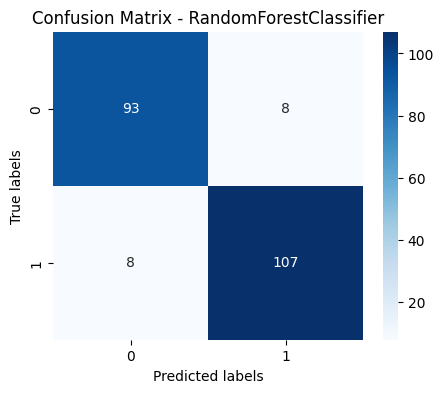

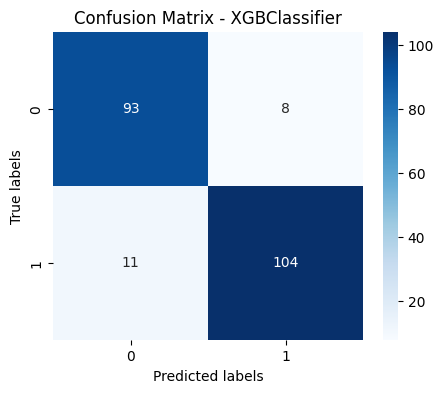

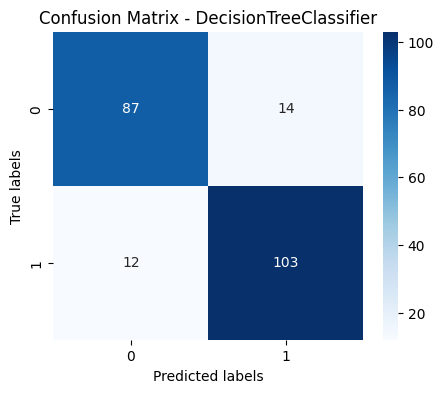

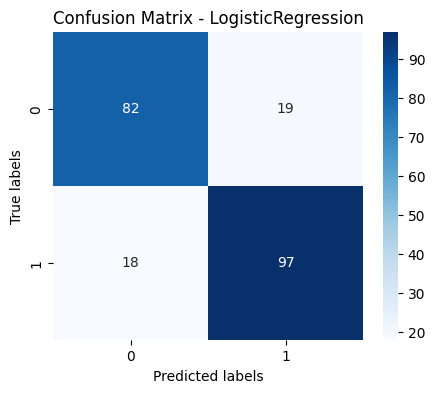

               Model Name  accuracy   roc auc  f1-weighted       confusion_matrix
1  RandomForestClassifier  0.925926  0.964443     0.925926    [[93, 8], [8, 107]]
0           XGBClassifier  0.912037  0.952217     0.912099   [[93, 8], [11, 104]]
2  DecisionTreeClassifier  0.879630  0.889841     0.879547  [[87, 14], [12, 103]]
3      LogisticRegression  0.828704  0.913388     0.828648   [[82, 19], [18, 97]]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV, train_test_split
from xgboost import XGBClassifier

# Assume X_trainB, X_testB, y_trainB, y_testB are already defined

random_state = 42  # Define random_state for reproducibility

# Define the parameter grids for each classifier
param_grids = {
    'XGBClassifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.2],
        'subsample': [0.8, 1.0],
        'colsample_bytree': [0.8, 1.0]
    },
    'RandomForestClassifier': {
        'n_estimators': [100, 150, 200, 250, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 3, 4],
        'bootstrap': [True, False]
    },
    'DecisionTreeClassifier': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 3, 4],
        'criterion': ['gini', 'entropy']
    },
    'LogisticRegression': {
        'penalty': ['l1', 'l2'],
        'C': [0.1, 0.5, 1, 5, 10],
        'solver': ['liblinear', 'lbfgs'],
        'max_iter': [100, 200, 300]
    }
}

# Initialize classifiers
classifiers = {
    'XGBClassifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'RandomForestClassifier': RandomForestClassifier(random_state=random_state),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=random_state),
    'LogisticRegression': LogisticRegression(random_state=random_state)
}

# Store results
acc_scoreB = []
roc_scoreB = []
f1B = []
name_modelB = []
conf_matricesB = []

# Perform GridSearchCV for each classifier
for name, clf in classifiers.items():
    print(f"Tuning hyperparameters for {name}")
    grid_search = GridSearchCV(estimator=clf, param_grid=param_grids[name], cv=3, n_jobs=-1, verbose=2, scoring='f1_weighted')
    grid_search.fit(X_trainB, y_trainB)

    best_clf = grid_search.best_estimator_

    # Evaluate the tuned model
    y_predB = best_clf.predict(X_testB)

    # Append the results
    acc_scoreB.append(accuracy_score(y_testB, y_predB))
    if hasattr(best_clf, "predict_proba"):  # Check if classifier has predict_proba
        roc_scoreB.append(roc_auc_score(y_testB, best_clf.predict_proba(X_testB)[:, 1]))
    else:
        roc_scoreB.append(roc_auc_score(y_testB, best_clf.decision_function(X_testB)))
    f1B.append(f1_score(y_testB, y_predB, average='weighted'))
    name_modelB.append(type(best_clf).__name__)
    conf_matricesB.append(confusion_matrix(y_testB, y_predB))

# Create a DataFrame with the results
resultB = pd.DataFrame({
    'Model Name': name_modelB,
    'accuracy': acc_scoreB,
    'roc auc': roc_scoreB,
    'f1-weighted': f1B,
    'confusion_matrix': conf_matricesB
})

# Sort the result DataFrame in descending order based on the F1-weighted score
resultB.sort_values('f1-weighted', ascending=False, inplace=True)

# Display the confusion matrices
for i, conf_matrix in enumerate(resultB['confusion_matrix']):
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Confusion Matrix - {resultB.iloc[i]["Model Name"]}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

# Print the results
print(resultB)

resultB1 = resultB


###best model evaluation using GridsearchCV

Best Model:
Model Name          RandomForestClassifier
accuracy                          0.925926
roc auc                           0.964443
f1-weighted                       0.925926
confusion_matrix       [[93, 8], [8, 107]]
Name: 1, dtype: object


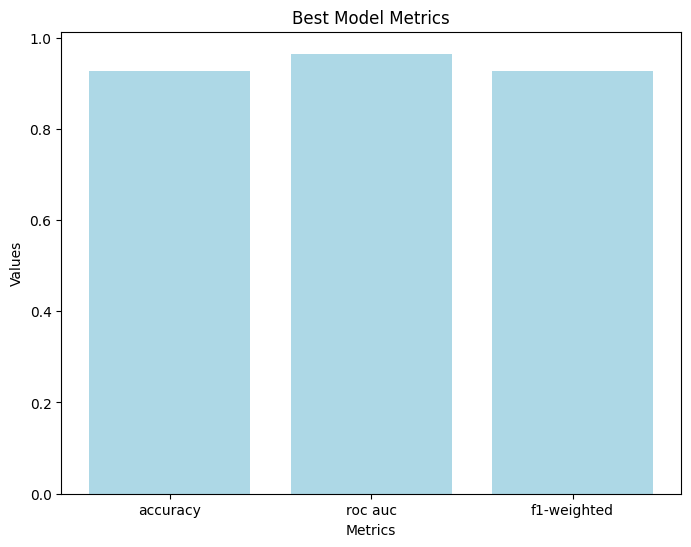

In [ ]:
# Select the best model based on a chosen metric (e.g., accuracy)
best_model1 = resultB.iloc[0]

# Print information about the best model
print("Best Model:")
print(best_model1)

import matplotlib.pyplot as plt

# Extract metrics from the best_model dictionary
metrics = ['accuracy', 'roc auc', 'f1-weighted']
values = [best_model1[metric] for metric in metrics]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color='lightblue')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Best Model Metrics')
plt.show()

##### using RandomizedSearchCV

Tuning hyperparameters for XGBClassifier
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Tuning hyperparameters for RandomForestClassifier
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Tuning hyperparameters for DecisionTreeClassifier
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Tuning hyperparameters for LogisticRegression
Fitting 3 folds for each of 50 candidates, totalling 150 fits


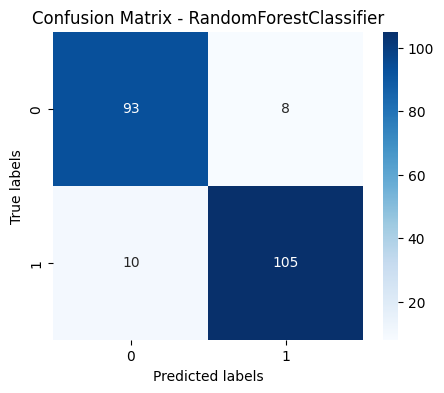

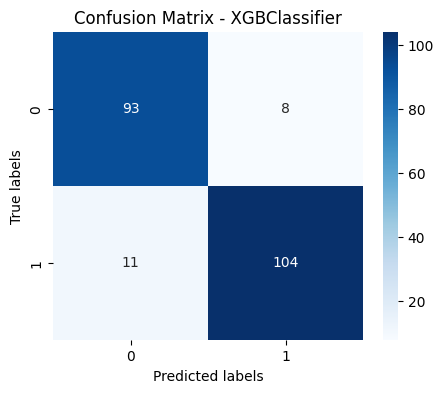

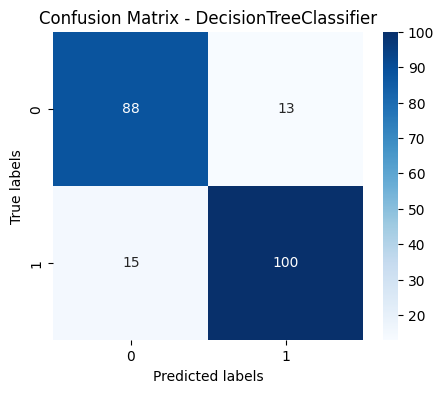

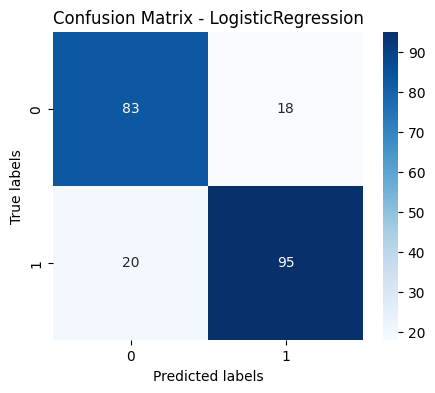

               Model Name  accuracy   roc auc  f1-weighted       confusion_matrix
1  RandomForestClassifier  0.916667  0.961774     0.916710   [[93, 8], [10, 105]]
0           XGBClassifier  0.912037  0.951356     0.912099   [[93, 8], [11, 104]]
2  DecisionTreeClassifier  0.870370  0.870426     0.870437  [[88, 13], [15, 100]]
3      LogisticRegression  0.824074  0.911924     0.824165   [[83, 18], [20, 95]]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from xgboost import XGBClassifier
from scipy.stats import randint, uniform

# Assume X_trainB, X_testB, y_trainB, y_testB are already defined

random_state = 42  # Define random_state for reproducibility

# Define the parameter distributions for each classifier
param_dists = {
    'XGBClassifier': {
        'n_estimators': randint(100, 500),
        'max_depth': randint(3, 10),
        'learning_rate': uniform(0.01, 0.3),
        'subsample': uniform(0.7, 1.0),
        'colsample_bytree': uniform(0.7, 1.0),
        'gamma': uniform(0, 0.5),
        'reg_alpha': uniform(0, 0.5),
        'reg_lambda': uniform(0.5, 1.5)
    },
    'RandomForestClassifier': {
        'n_estimators': randint(100, 300),
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 4),
        'bootstrap': [True, False]
    },
    'DecisionTreeClassifier': {
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': randint(2, 10),
        'min_samples_leaf': randint(1, 4),
        'criterion': ['gini', 'entropy']
    },
    'LogisticRegression': {
        'penalty': ['l1', 'l2'],
        'C': uniform(0.1, 10),
        'solver': ['liblinear', 'lbfgs'],
        'max_iter': [100, 200, 300]
    }
}

# Initialize classifiers
classifiers = {
    'XGBClassifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'RandomForestClassifier': RandomForestClassifier(random_state=random_state),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=random_state),
    'LogisticRegression': LogisticRegression(random_state=random_state)
}

# Store results
acc_scoreB = []
roc_scoreB = []
f1B = []
name_modelB = []
conf_matricesB = []

# Perform RandomizedSearchCV for each classifier
for name, clf in classifiers.items():
    print(f"Tuning hyperparameters for {name}")
    random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dists[name], n_iter=50, cv=3, n_jobs=-1, verbose=2, scoring='f1_weighted', random_state=random_state)
    random_search.fit(X_trainB, y_trainB)

    best_clf = random_search.best_estimator_

    # Evaluate the tuned model
    y_predB = best_clf.predict(X_testB)

    # Append the results
    acc_scoreB.append(accuracy_score(y_testB, y_predB))
    if hasattr(best_clf, "predict_proba"):  # Check if classifier has predict_proba
        roc_scoreB.append(roc_auc_score(y_testB, best_clf.predict_proba(X_testB)[:, 1]))
    else:
        roc_scoreB.append(roc_auc_score(y_testB, best_clf.decision_function(X_testB)))
    f1B.append(f1_score(y_testB, y_predB, average='weighted'))
    name_modelB.append(type(best_clf).__name__)
    conf_matricesB.append(confusion_matrix(y_testB, y_predB))

# Create a DataFrame with the results
resultB = pd.DataFrame({
    'Model Name': name_modelB,
    'accuracy': acc_scoreB,
    'roc auc': roc_scoreB,
    'f1-weighted': f1B,
    'confusion_matrix': conf_matricesB
})

# Sort the result DataFrame in descending order based on the F1-weighted score
resultB.sort_values('f1-weighted', ascending=False, inplace=True)

# Display the confusion matrices
for i, conf_matrix in enumerate(resultB['confusion_matrix']):
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Confusion Matrix - {resultB.iloc[i]["Model Name"]}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

# Print the results
print(resultB)

resultB2 = resultB

##best model evaluation after using RandomizedSearchCV

Best Model:
Model Name          RandomForestClassifier
accuracy                          0.916667
roc auc                           0.961774
f1-weighted                        0.91671
confusion_matrix      [[93, 8], [10, 105]]
Name: 1, dtype: object


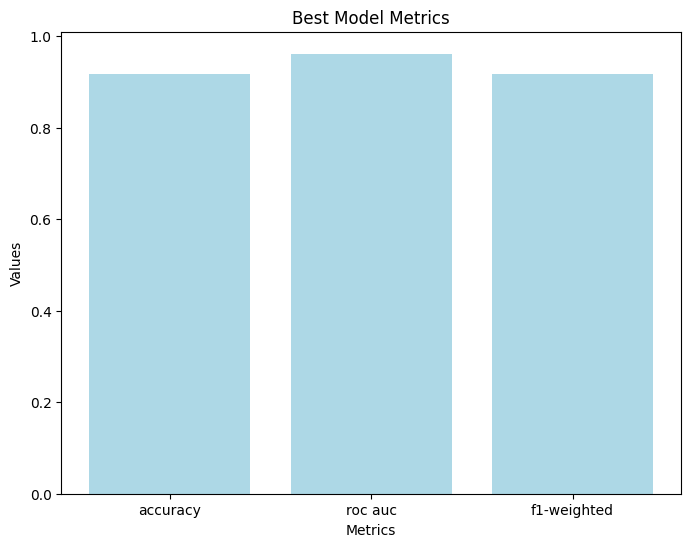

In [ ]:
# Select the best model based on a chosen metric (e.g., accuracy)
best_model2 = resultB.iloc[0]

# Print information about the best model
print("Best Model:")
print(best_model2)

import matplotlib.pyplot as plt

# Extract metrics from the best_model dictionary
metrics = ['accuracy', 'roc auc', 'f1-weighted']
values = [best_model2[metric] for metric in metrics]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color='lightblue')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Best Model Metrics')
plt.show()

#### using Bayesian Optimization

In [ ]:
!pip install scikit-optimize

Tuning hyperparameters for XGBClassifier
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds

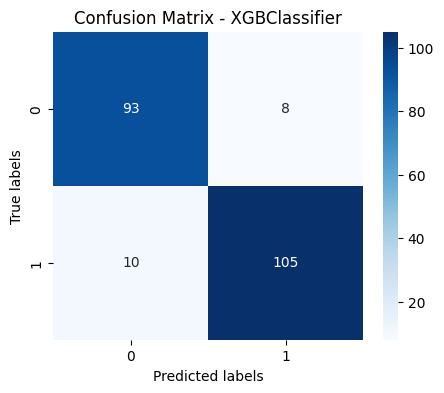

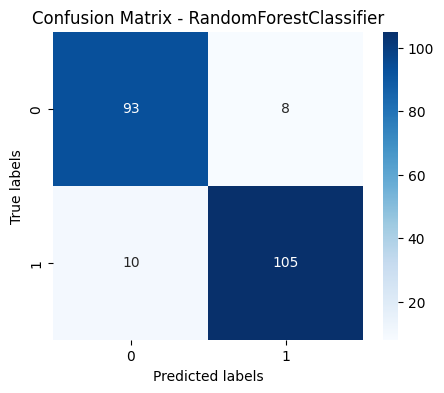

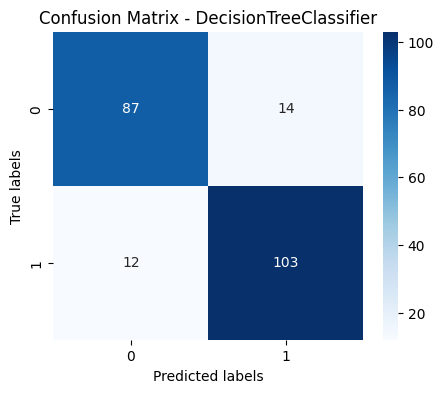

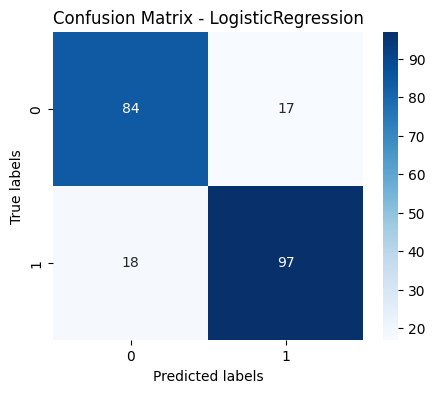

               Model Name  accuracy   roc auc  f1-weighted       confusion_matrix
0           XGBClassifier  0.916667  0.946276     0.916710   [[93, 8], [10, 105]]
1  RandomForestClassifier  0.916667  0.963065     0.916710   [[93, 8], [10, 105]]
2  DecisionTreeClassifier  0.879630  0.889841     0.879547  [[87, 14], [12, 103]]
3      LogisticRegression  0.837963  0.912957     0.838008   [[84, 17], [18, 97]]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from xgboost import XGBClassifier

# Assume X_trainB, X_testB, y_trainB, y_testB are already defined

random_state = 42  # Define random_state for reproducibility

# Define the parameter spaces for each classifier
param_spaces = {
    'XGBClassifier': {
        'n_estimators': Integer(100, 500),
        'max_depth': Integer(3, 10),
        'learning_rate': Real(0.01, 0.3),
        'subsample': Real(0.7, 1.0),
        'colsample_bytree': Real(0.7, 1.0),
        'gamma': Real(0, 0.5),
        'reg_alpha': Real(0, 0.5),
        'reg_lambda': Real(0.5, 1.5)
    },
    'RandomForestClassifier': {
        'n_estimators': Integer(100, 300),
        'max_depth': Categorical([None, 10, 20, 30]),
        'min_samples_split': Integer(2, 10),
        'min_samples_leaf': Integer(1, 4),
        'bootstrap': Categorical([True, False])
    },
    'DecisionTreeClassifier': {
        'max_depth': Categorical([None, 10, 20, 30]),
        'min_samples_split': Integer(2, 10),
        'min_samples_leaf': Integer(1, 4),
        'criterion': Categorical(['gini', 'entropy'])
    },
    'LogisticRegression': {
        'penalty': Categorical(['l2']),  # Only 'l2' penalty with 'lbfgs' solver
        'C': Real(0.1, 10),
        'solver': Categorical(['lbfgs']),
        'max_iter': Integer(100, 300)
    }
}

# Initialize classifiers
classifiers = {
    'XGBClassifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'RandomForestClassifier': RandomForestClassifier(random_state=random_state),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=random_state),
    'LogisticRegression': LogisticRegression(random_state=random_state)
}

# Store results
acc_scoreB = []
roc_scoreB = []
f1B = []
name_modelB = []
conf_matricesB = []

# Perform BayesSearchCV for each classifier
for name, clf in classifiers.items():
    print(f"Tuning hyperparameters for {name}")
    bayes_search = BayesSearchCV(
        estimator=clf,
        search_spaces=param_spaces[name],
        n_iter=50,
        cv=3,
        n_jobs=-1,
        verbose=2,
        scoring='f1_weighted',
        random_state=random_state
    )
    bayes_search.fit(X_trainB, y_trainB)

    best_clf = bayes_search.best_estimator_

    # Evaluate the tuned model
    y_predB = best_clf.predict(X_testB)

    # Append the results
    acc_scoreB.append(accuracy_score(y_testB, y_predB))
    if hasattr(best_clf, "predict_proba"):  # Check if classifier has predict_proba
        roc_scoreB.append(roc_auc_score(y_testB, best_clf.predict_proba(X_testB)[:, 1]))
    else:
        roc_scoreB.append(roc_auc_score(y_testB, best_clf.decision_function(X_testB)))
    f1B.append(f1_score(y_testB, y_predB, average='weighted'))
    name_modelB.append(type(best_clf).__name__)
    conf_matricesB.append(confusion_matrix(y_testB, y_predB))

# Create a DataFrame with the results
resultB = pd.DataFrame({
    'Model Name': name_modelB,
    'accuracy': acc_scoreB,
    'roc auc': roc_scoreB,
    'f1-weighted': f1B,
    'confusion_matrix': conf_matricesB
})

# Sort the result DataFrame in descending order based on the F1-weighted score
resultB.sort_values('f1-weighted', ascending=False, inplace=True)

# Display the confusion matrices
for i, conf_matrix in enumerate(resultB['confusion_matrix']):
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Confusion Matrix - {resultB.iloc[i]["Model Name"]}')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.show()

# Print the results
print(resultB)

resultB3 = resultB


##best model evaluation after using BayesSearchCV

Best Model:
Model Name                 XGBClassifier
accuracy                        0.916667
roc auc                         0.946276
f1-weighted                      0.91671
confusion_matrix    [[93, 8], [10, 105]]
Name: 0, dtype: object


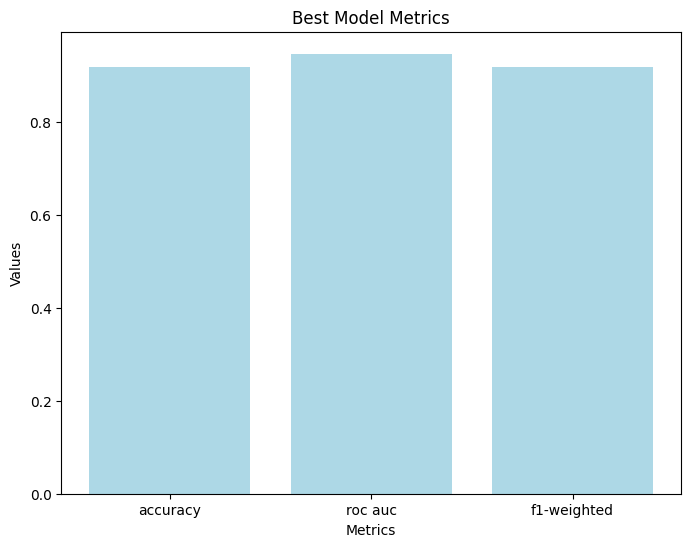

In [ ]:
# Select the best model based on a chosen metric (e.g., accuracy)
best_model3 = resultB.iloc[0]

# Print information about the best model
print("Best Model:")
print(best_model3)

import matplotlib.pyplot as plt

# Extract metrics from the best_model dictionary
metrics = ['accuracy', 'roc auc', 'f1-weighted']
values = [best_model3[metric] for metric in metrics]

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color='lightblue')
plt.xlabel('Metrics')
plt.ylabel('Values')
plt.title('Best Model Metrics')
plt.show()

##Comparison between best models

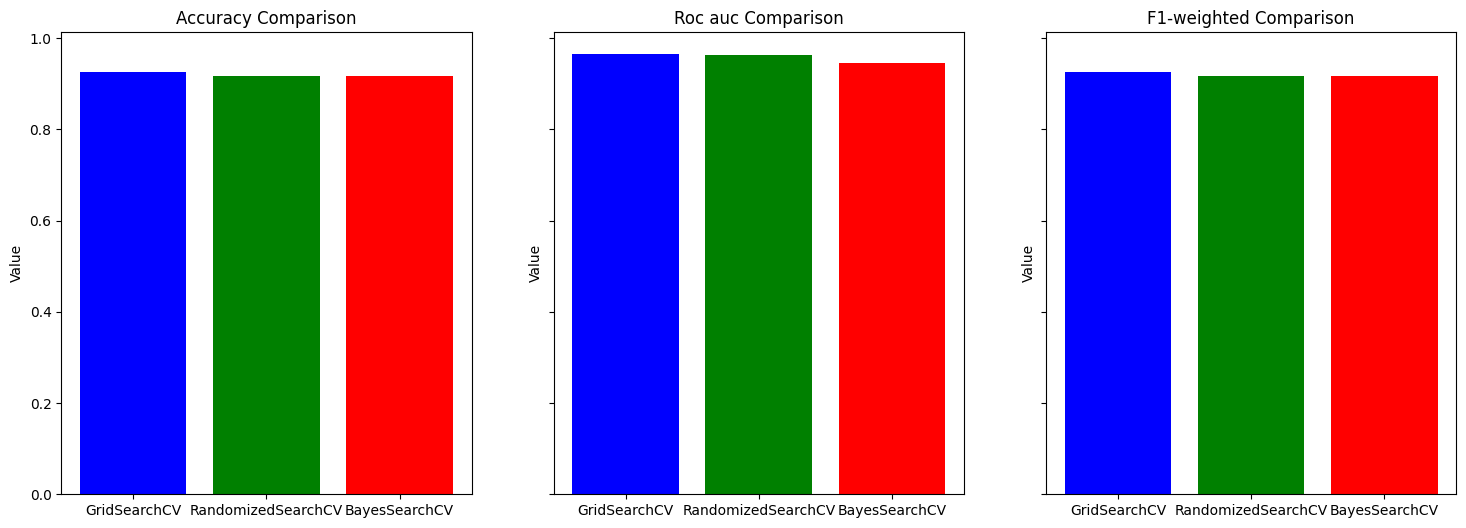

In [ ]:
import matplotlib.pyplot as plt

# Metrics for comparison
metrics = ['accuracy', 'roc auc', 'f1-weighted']

# Values for each search method
values_grid = [best_model1[metric] for metric in metrics]
values_random = [best_model2[metric] for metric in metrics]
values_bayes = [best_model3[metric] for metric in metrics]

# Create subplots for each metric
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plotting
for i, metric in enumerate(metrics):
    axs[i].bar(['GridSearchCV', 'RandomizedSearchCV', 'BayesSearchCV'], [values_grid[i], values_random[i], values_bayes[i]], color=['blue', 'green', 'red'])
    axs[i].set_title(f'{metric.capitalize()} Comparison')
    axs[i].set_ylabel('Value')

plt.show()


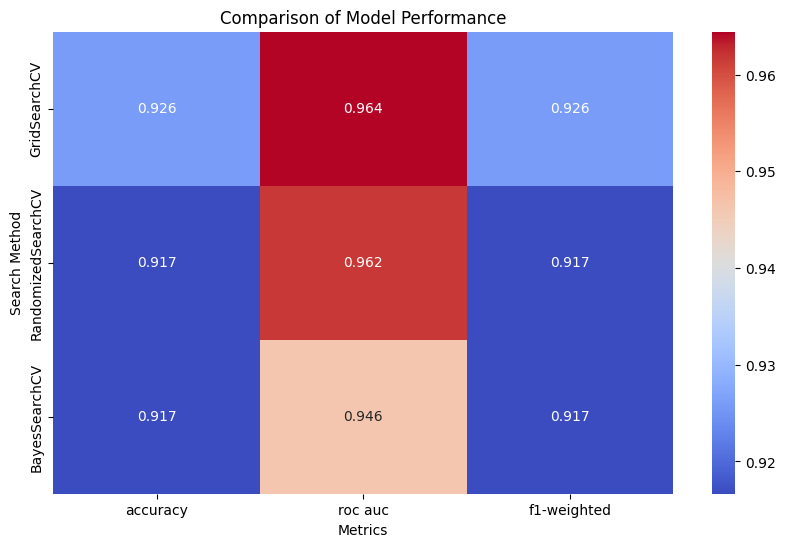

In [ ]:
import seaborn as sns

# Metrics for comparison
metrics = ['accuracy', 'roc auc', 'f1-weighted']

# Values for each search method
values = [
    [best_model1[metric] for metric in metrics],
    [best_model2[metric] for metric in metrics],
    [best_model3[metric] for metric in metrics]
]

# Create a DataFrame for heatmap
df_heatmap = pd.DataFrame(values, columns=metrics, index=['GridSearchCV', 'RandomizedSearchCV', 'BayesSearchCV'])

# Plotting the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_heatmap, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Comparison of Model Performance')
plt.xlabel('Metrics')
plt.ylabel('Search Method')
plt.show()


In [ ]:
# Metrics for comparison
metrics = ['accuracy', 'roc auc', 'f1-weighted']

# Values for each search method
values_grid = [best_model1[metric] for metric in metrics]
values_random = [best_model2[metric] for metric in metrics]
values_bayes = [best_model3[metric] for metric in metrics]

# Calculate the average scores for each search method
avg_scores_grid = sum(values_grid) / len(metrics)
avg_scores_random = sum(values_random) / len(metrics)
avg_scores_bayes = sum(values_bayes) / len(metrics)

# Find the maximum average score
max_avg_score = max(avg_scores_grid, avg_scores_random, avg_scores_bayes)

# Determine the best model based on the maximum average score
if max_avg_score == avg_scores_grid:
    best_model = "GridSearchCV"
elif max_avg_score == avg_scores_random:
    best_model = "RandomizedSearchCV"
else:
    best_model = "BayesSearchCV"

# Print the conclusion
print(f"The best model among GridSearchCV, RandomizedSearchCV, and BayesSearchCV is: {best_model}")


The best model among GridSearchCV, RandomizedSearchCV, and BayesSearchCV is: GridSearchCV


Therefore, the best model is the randomforestClassifier with hyerparametertuning using GridSearchCV